#**APRENDIZAJE AUTOMÁTICO - MIGUEL MARINES**
##**<u>Modelado, Balanceo de Factores e Importancia de Factores</u>**
---
---



 # **Parte 1**. Análisis Descriptivo y Preprocesamiento de los Datos.

### **1.** Introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).

El problema de rotación de personal, también conocido como "attrition" o "rotación laboral", es una preocupación significativa para las organizaciones en todo el mundo. Se refiere a la frecuencia con la que los empleados de una empresa abandonan sus puestos de trabajo y son reemplazados por nuevos trabajadores en un período determinado. Esta tasa de rotación puede afectar de manera significativa la estabilidad y el rendimiento de una organización, ya que implica costos directos e indirectos asociados con la contratación, capacitación y adaptación de nuevos empleados.

La rotación de personal puede ser causada por una variedad de factores, que van desde insatisfacción laboral, falta de oportunidades de desarrollo profesional, conflictos en el lugar de trabajo, hasta problemas de gestión y cultura organizacional. Esta problemática no solo impacta en la continuidad operativa, sino que también puede afectar la moral de los empleados restantes y la percepción externa de la empresa.

Abordar eficazmente el problema de rotación de personal es de suma importancia para las empresas, ya que la retención exitosa del talento no solo contribuye a la estabilidad organizacional, sino que también mejora la productividad y fortalece la reputación de la empresa en el mercado laboral.

### **2.** Carga de la Base de Datos y Análisis Necesarios.

In [ ]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')


# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/Machine_Learning"
os.chdir(DIR)


# Importación de librerías.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga de archivo CSV.
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### **A.** ¿Cuántas y cuáles de las variables son numéricas?

In [ ]:
# Variables numéricas del DataFrame.
variables_numericas = df.select_dtypes(include = 'number')

# Se imprime el número de variables numéricas.
print('El conjunto de datos tiene ' + str(len(variables_numericas.columns)) + ' variables numéricas.\n')

# Se imprime las variables numéricas.
print('Variables Numéricas:')
for i, variable in enumerate(variables_numericas.columns, 1):
    print(f'{i}. {variable}')

El conjunto de datos tiene 26 variables numéricas.

Variables Numéricas:
1. Age
2. DailyRate
3. DistanceFromHome
4. Education
5. EmployeeCount
6. EmployeeNumber
7. EnvironmentSatisfaction
8. HourlyRate
9. JobInvolvement
10. JobLevel
11. JobSatisfaction
12. MonthlyIncome
13. MonthlyRate
14. NumCompaniesWorked
15. PercentSalaryHike
16. PerformanceRating
17. RelationshipSatisfaction
18. StandardHours
19. StockOptionLevel
20. TotalWorkingYears
21. TrainingTimesLastYear
22. WorkLifeBalance
23. YearsAtCompany
24. YearsInCurrentRole
25. YearsSinceLastPromotion
26. YearsWithCurrManager


##### **A.I.** ¿Cuántas y cuáles de las variables numéricas son de valor entero?

In [ ]:
# Variables numéricas enteras del DataFrame.
variables_numericas_enteras = df.select_dtypes(include = 'int')

# Se imprime el número de variables numéricas enteras.
print('El conjunto de datos tiene ' + str(len(variables_numericas_enteras.columns)) + ' variables numéricas enteras.\n')

# Se imprime las variables numéricas enteras.
print('Variables Numéricas Enteras:')
for i, variable in enumerate(variables_numericas_enteras.columns, 1):
    print(f'{i}. {variable}')

El conjunto de datos tiene 26 variables numéricas enteras.

Variables Numéricas Enteras:
1. Age
2. DailyRate
3. DistanceFromHome
4. Education
5. EmployeeCount
6. EmployeeNumber
7. EnvironmentSatisfaction
8. HourlyRate
9. JobInvolvement
10. JobLevel
11. JobSatisfaction
12. MonthlyIncome
13. MonthlyRate
14. NumCompaniesWorked
15. PercentSalaryHike
16. PerformanceRating
17. RelationshipSatisfaction
18. StandardHours
19. StockOptionLevel
20. TotalWorkingYears
21. TrainingTimesLastYear
22. WorkLifeBalance
23. YearsAtCompany
24. YearsInCurrentRole
25. YearsSinceLastPromotion
26. YearsWithCurrManager


##### **A.II.** ¿Cuántas y cuáles de las variables numéricas son de valor real (flotante)?

In [ ]:
# Variables numéricas flotantes del DataFrame.
variables_numericas_flotantes = df.select_dtypes(include = 'float')

# Se imprime el número de variables numéricas flotantes.
print('El conjunto de datos tiene ' + str(len(variables_numericas_flotantes.columns)) + ' variables numéricas flotantes.\n')

# Se imprime las variables numéricas flotantes.
print('Variables Numéricas Flotantes:')
for i, variable in enumerate(variables_numericas_flotantes.columns, 1):
    print(f'{i}. {variable}')

El conjunto de datos tiene 0 variables numéricas flotantes.

Variables Numéricas Flotantes:


##### **A.III.**  ¿Cuántas y cuáles de las variables numéricas se pueden anular del problema?

Las variables numéricas que se pueden anular del problema son las siguientes:

1. EmployeeCount: Es el número de empleados por registro y siempre corresponde a 1 en todo el conjunto de datos. Como todos los registros tienen el mismo valor constante para la variable, no contribuye a la variabilidad de los datos y no proporcionará insights valiosos sobre patrones, relaciones o tendencias.

2. EmployeeNumber: Es el número de identificación único de cada empleado y como se busca analizar patrones generales y tendencias en los datos, los identificadores individuales no son necesarios y podrían agregar ruido innecesario al análisis.

3. StandardHours: Es el mismo valor constante de 80 para todos los empleados por lo que no aporta información útil al análisis estadístico. Como todos los registros tienen el mismo valor para la variable, no contribuye a la variabilidad de los datos y no proporcionará insights valiosos sobre patrones, relaciones o tendencias.

Las siguientes secciones de código respaldan la respuesta.

In [ ]:
# Imprime el número de registros por columna en el conjunto de datos
print('Número de Registros por Columna en el Conjunto de Datos: ')
print(df.shape[0])
print('-' * 55)
print()

# Variables numéricas enteras a eliminar.
variables_numericas_eliminar = df[['EmployeeCount', 'StandardHours']]

# Imprime el recuento de valores únicos de una columna específica.
for column in variables_numericas_eliminar:
    print('-' * 55)
    print('Value Count Variable: ' + str(column))
    print(df[column].value_counts())
    print('-' * 55)
    print()

Número de Registros por Columna en el Conjunto de Datos: 
1470
-------------------------------------------------------

-------------------------------------------------------
Value Count Variable: EmployeeCount
1    1470
Name: EmployeeCount, dtype: int64
-------------------------------------------------------

-------------------------------------------------------
Value Count Variable: StandardHours
80    1470
Name: StandardHours, dtype: int64
-------------------------------------------------------



In [ ]:
# Imprime número de registros y valores únicos de la variable EmployeeNumber.
print('Numero Total Registrtos: ' + str(df.shape[0]))
print('Valores Unicos en la Variable EmployeeNumber: ' + str(df['EmployeeNumber'].nunique()))

Numero Total Registrtos: 1470
Valores Unicos en la Variable EmployeeNumber: 1470


#### **B.**  ¿Cuántas y cuáles de las variables son categóricas?

In [ ]:
# Variables categóricas ordinales.
variables_categoricas_ordinales = df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                         'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']]

# Variables categóricas nominales.
variables_categoricas_nominales = df.select_dtypes(include = 'object')

# Variables categóricas.
variables_categoricas = variables_categoricas_ordinales + variables_categoricas_nominales

# Imprime número de variables categóricas.
print('El conjunto de datos tiene ' + str(len(variables_categoricas.columns)) + ' variables categóricas.\n')

# Imprime variables categóricas.
print('Variables Categóricas:')
for i, variable in enumerate(variables_categoricas.columns, 1):
    print(f'{i}. {variable}')

El conjunto de datos tiene 18 variables categóricas.

Variables Categóricas:
1. Attrition
2. BusinessTravel
3. Department
4. Education
5. EducationField
6. EnvironmentSatisfaction
7. Gender
8. JobInvolvement
9. JobLevel
10. JobRole
11. JobSatisfaction
12. MaritalStatus
13. Over18
14. OverTime
15. PerformanceRating
16. RelationshipSatisfaction
17. StockOptionLevel
18. WorkLifeBalance


##### **B.I.** ¿Cuántas y cuáles de las variables son binarias?

In [ ]:
# Identificación de variables binarias.
variables_binarias = [col for col in df.columns if all(x in ['Yes', 'No'] for x in df[col])]

# Imprime las variables binarias.
print("Variables Binarias:\n")
for i, col in enumerate(variables_binarias, 1):
    print(f"{i}. {col}")

Variables Binarias:

1. Attrition
2. OverTime


In [ ]:
# Imprime el recuento de valores únicos de la columna 'Over18'.
print(df['Over18'].value_counts())
print('-' * 50)

Y    1470
Name: Over18, dtype: int64
--------------------------------------------------


La variable 'Over18' tambien es binaria pero todos los registros corresponde a 'Y', lo que indican que todos los empleados son mayores a 18 años. Posteriormente será borrada esta variable del conjunto de datos, ya que no proporcionará insights valiosos sobre patrones, relaciones o tendencias.

##### **B.II.** ¿Cuántas y cuáles de las variables son nominales? Se indica el total de niveles que tiene cada una de estas variables.

In [ ]:
# Imprime el número de variables categóricas nominales.
print('El conjunto de datos tiene ' + str(len(variables_categoricas_nominales.columns)) + ' variables categóricas nominales.\n')

# Imprime las variables categóricas nominales.
print('Variables Categóricas Nominales:')
for i, variable in enumerate(variables_categoricas_nominales.columns, 1):
    print(f'{i}. {variable}')

# Imprime los niveles de las variables categóricas nominales.
print('\nNiveles Variables Categóricas Nominales:')
for i, columna in enumerate(variables_categoricas_nominales, start = 1):
    numero_niveles = df[columna].nunique()
    print(f"{i}. La variable '{columna}' tiene {numero_niveles} niveles.")

El conjunto de datos tiene 9 variables categóricas nominales.

Variables Categóricas Nominales:
1. Attrition
2. BusinessTravel
3. Department
4. EducationField
5. Gender
6. JobRole
7. MaritalStatus
8. Over18
9. OverTime

Niveles Variables Categóricas Nominales:
1. La variable 'Attrition' tiene 2 niveles.
2. La variable 'BusinessTravel' tiene 3 niveles.
3. La variable 'Department' tiene 3 niveles.
4. La variable 'EducationField' tiene 6 niveles.
5. La variable 'Gender' tiene 2 niveles.
6. La variable 'JobRole' tiene 9 niveles.
7. La variable 'MaritalStatus' tiene 3 niveles.
8. La variable 'Over18' tiene 1 niveles.
9. La variable 'OverTime' tiene 2 niveles.


##### **B.III.** ¿Cuántas y cuáles de las variables son ordinales? Se indica el total de niveles que tiene cada una de estas variables.

In [ ]:
# Imprime el número de variables categóricas ordinales.
print('El conjunto de datos tiene ' + str(len(variables_categoricas_ordinales.columns)) + ' variables categóricas ordinales.\n')

# Imprime las variables categóricas ordinales.
print('Variables Categóricas Ordinales:')
for i, variable in enumerate(variables_categoricas_ordinales.columns, 1):
    print(f'{i}. {variable}')

# Imprime los niveles de las variables categóricas ordinales.
print('\nNiveles Variables Categóricas Ordinales:')
for i, columna in enumerate(variables_categoricas_ordinales, start = 1):
    numero_niveles = df[columna].nunique()
    print(f"{i}. La variable '{columna}' tiene {numero_niveles} niveles.")

El conjunto de datos tiene 9 variables categóricas ordinales.

Variables Categóricas Ordinales:
1. Education
2. EnvironmentSatisfaction
3. JobInvolvement
4. JobLevel
5. JobSatisfaction
6. PerformanceRating
7. RelationshipSatisfaction
8. StockOptionLevel
9. WorkLifeBalance

Niveles Variables Categóricas Ordinales:
1. La variable 'Education' tiene 5 niveles.
2. La variable 'EnvironmentSatisfaction' tiene 4 niveles.
3. La variable 'JobInvolvement' tiene 4 niveles.
4. La variable 'JobLevel' tiene 5 niveles.
5. La variable 'JobSatisfaction' tiene 4 niveles.
6. La variable 'PerformanceRating' tiene 2 niveles.
7. La variable 'RelationshipSatisfaction' tiene 4 niveles.
8. La variable 'StockOptionLevel' tiene 4 niveles.
9. La variable 'WorkLifeBalance' tiene 4 niveles.


##### **B.IV.** ¿Cuántas y cuáles de estas variables categóricas se pueden anular del problema?

Las variables categóricas que se pueden anular del problema son las siguientes:

1. Over18: Indica si el empleado es mayor a 18 años de edad. En este conjunto de datos todos los empleados son mayores de edad por lo que siempre tiene la constante 'Y'. Como todos los registros tienen el mismo valor para la variable, no contribuye a la variabilidad de los datos y no proporcionará insights valiosos sobre patrones, relaciones o tendencias.

2. MaritalStatus: Indica si el empleado es soltero, casado o divorciado. No tiene relevancia al enfoque específico de este análisis estadístico y podría agregar ruido.

#### **C.**  En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?

La clasificación de las variables generalmente se hace de manera objetiva y se basa en las características intrínsecas de los datos. Sin embargo, en algunas situaciones, los analistas pueden tener cierta flexibilidad en la interpretación y clasificación de las variables, especialmente cuando hay ambigüedad o cuando se trata de datos cualitativos que pueden tener interpretaciones subjetivas.


Desde mi punto de vista, en esta base de datos la clasificación de los tipos de datos debería de ser la misma por todos los analistas. Sin embargo, podría darse el caso de que algunos analistas clasifiquen las variables 'TrainingTimesLastYear' y 'NumCompaniesWorked' como variables categóricas, ya que esas variables son de valor numérico entero y el máximo valor registrado es menor a 10, dado el corto rango de valores enteros podría haber algunos analistas que catalogarían esas variables como algún tipo de variables categóricas en vez de variables cuantitativas.

#### **D.** De existir, se eliminan del problema todas las variables que se consideran que no están aportando información alguna.

In [ ]:
# Variables a eliminar.
columnas_eliminar = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18', 'MaritalStatus']
# Eliminación de variables.
df = df.drop(columnas_eliminar, axis = 1)

 ### **3.** Se realiza una partición de los datos en Entrenamiento,Validación y Prueba, del 70%, 15% y 15%, respectivamente. Se llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Se asegura que dicha partición conserve la estratificación de las clases de la variable “Attrition”.

In [ ]:
from sklearn.model_selection import train_test_split

# División de variables características y variable objetivo.
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

# División de datos de entrenamiento, validación y prueba.
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size = 0.5, stratify = ytemp, random_state = 42)

#### **A.** Se despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.

In [ ]:
# Dimensiones de los conjuntos de entrenamiento, validación y prueba.
print("Dimensiones de los Conjuntos:\n")
print("1. Entrenamiento (Xtrain, ytrain):", Xtrain.shape, ytrain.shape)
print("2. Validación (Xval, yval):", Xval.shape, yval.shape)
print("3. Prueba (Xtest, ytest):", Xtest.shape, ytest.shape)

Dimensiones de los Conjuntos:

1. Entrenamiento (Xtrain, ytrain): (1029, 29) (1029,)
2. Validación (Xval, yval): (220, 29) (220,)
3. Prueba (Xtest, ytest): (221, 29) (221,)


 ### **4.** Usando solamente el conjunto de Entrenamiento, se obtienen los histogramas de las variables numéricas.

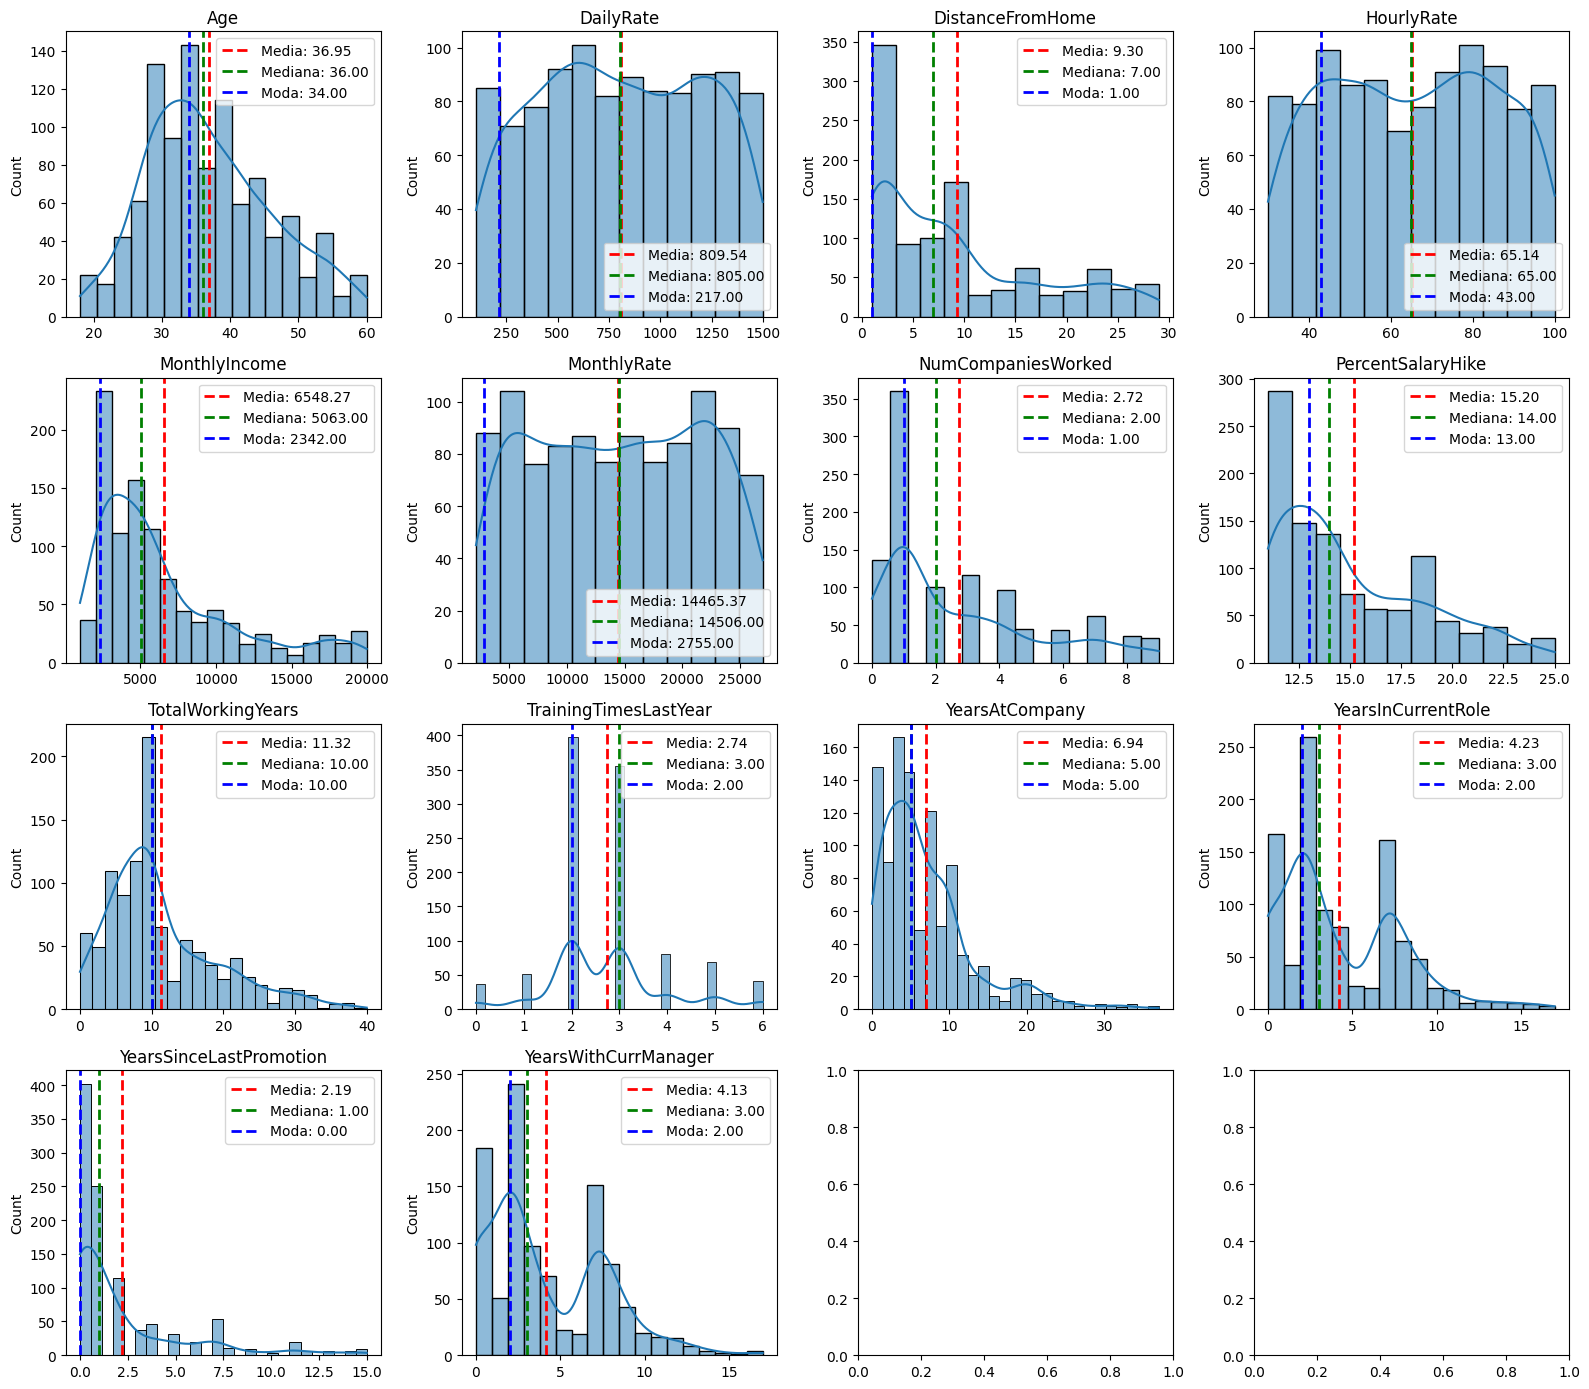

In [ ]:
# Variables Cuantitativas
variables_numericas = df.select_dtypes(include = ['number'])
variables_cuantitativas = variables_numericas.drop(columns = variables_categoricas_ordinales.columns)
columnas_cuantitativas = variables_cuantitativas.columns

# Creación figura y ejes.
fig, axes = plt.subplots(4, 4, figsize = (16, 14))
axes = axes.ravel()

# Iteración sobre columnas numéricas y creación histogramas.
for col, ax in zip(Xtrain[columnas_cuantitativas], axes):
    sns.histplot(Xtrain[col], ax = ax, kde = True)
    media = Xtrain[col].mean()
    mediana = Xtrain[col].median()
    moda = Xtrain[col].mode().values[0]  # Múltiples modas, se toma la primera.
    ax.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 2, label = f'Media: {media:.2f}')
    ax.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 2, label = f'Mediana: {mediana:.2f}')
    ax.axvline(moda, color = 'b', linestyle = 'dashed', linewidth = 2, label = f'Moda: {moda:.2f}')
    ax.legend()
    ax.set(title = f'{col}', xlabel = None)

# Ajuste diseño figura.
plt.tight_layout()
plt.show()

#### **A.** En base a los gráficos ¿qué tipo de transformaciones se sugieren llevar acabo en dichas variables?

1. Transformación Logarítmica ('Age' y 'MonthlyIncome'): En base a la distribución de los datos de la variable, al aplicarle la transformación logarítmica la variable adquiere una distrtibución más normal.

2. Transformación Yeo-Johnson ('TotalWorkingYears' y 'YearsAtCompany'): En base a la distribución de los datos de la variable, al aplicarle la transformación Yeo-Johnson la variable adquiere una distrtibución más normal.

3. Escalamiento Min-Max (Todas las variables): Se sugiere utilizar este método para transformra las características del conjunto de datos para que todos los valores estén dentro del rango específico entre 0 y 1. Al estandarizar las variables de esta manera, ayudará a evitar que las variables con rangos numéricos más amplios dominen o sesguen los modelos, ya que todas las características contribuyen de manera equitativa.

El resto de las variables al aplicarles transformaciones no mostraron un cambio significativo, por lo que se decidió dejarlas sin aplcarles más transformaxiones adicionales al escalamiento Min-Max.

##### **A.I.** Se aplican las transformaciones determinadas a realizar, evitando el filtrado de información (data-leakage). A estas nuevas variables transformadas se les llamarán XtrainT, XvalT y XtestT.

In [ ]:
# Conjuntos de datos para aplicar las transformaciones.
XtrainT = Xtrain.copy()
XvalT = Xval.copy()
XtestT = Xtest.copy()

In [ ]:
# Logarítmica
# Transformación evitando el filtrado de información (data-leakage).

# Se aplica a las variables 'Age' y 'MonthlyIncome'.
columnas_log = ['Age', 'MonthlyIncome']

# Librería
from sklearn.preprocessing import FunctionTransformer

# Instancia del FunctionTransformer.
transformer = FunctionTransformer(func = np.log)

# Se aplica fit y transform a los datos de entrenamiento para evitar el filtrado de información.
XtrainT[columnas_log] = transformer.fit_transform(XtrainT[columnas_log])

# Se aplica solo transform a los datos de validación y prueba para evitar el filtrado de información.
XvalT[columnas_log] = transformer.transform(XvalT[columnas_log])
XtestT[columnas_log] = transformer.transform(XtestT[columnas_log])

In [ ]:
# Yeo-Johnson
# Transformación evitando el filtrado de información (data-leakage).

# Se aplica a las variables 'TotalWorkingYears' y 'YearsAtCompany'.
columnas_yeo_johnson = ['TotalWorkingYears', 'YearsAtCompany']

# Librería
from sklearn.preprocessing import PowerTransformer

# Instancia del MinMaxScaler.
transformer = PowerTransformer(method = "yeo-johnson", standardize = False)

# Se aplica fit y transform a los datos de entrenamiento para evitar el filtrado de información.
XtrainT[columnas_yeo_johnson] = transformer.fit_transform(XtrainT[columnas_yeo_johnson])

# Se aplica solo transform a los datos de validación y prueba para evitar el filtrado de información.
XvalT[columnas_yeo_johnson] = transformer.transform(XvalT[columnas_yeo_johnson])
XtestT[columnas_yeo_johnson] = transformer.transform(XtestT[columnas_yeo_johnson])

In [ ]:
# Min-Max
# Escalamiento evitando el filtrado de información (data-leakage).
# Se aplica a todas las variables cuantitativas.

# Librería
from sklearn.preprocessing import MinMaxScaler

# Instancia del MinMaxScaler.
scaler = MinMaxScaler()

# Se aplica fit y transform a los datos de entrenamiento para evitar el filtrado de información.
XtrainT[columnas_cuantitativas] = scaler.fit_transform(XtrainT[columnas_cuantitativas])

# Se aplica solo transform a los datos de validación y prueba para evitar el filtrado de información.
XvalT[columnas_cuantitativas] = scaler.transform(XvalT[columnas_cuantitativas])
XtestT[columnas_cuantitativas] = scaler.transform(XtestT[columnas_cuantitativas])

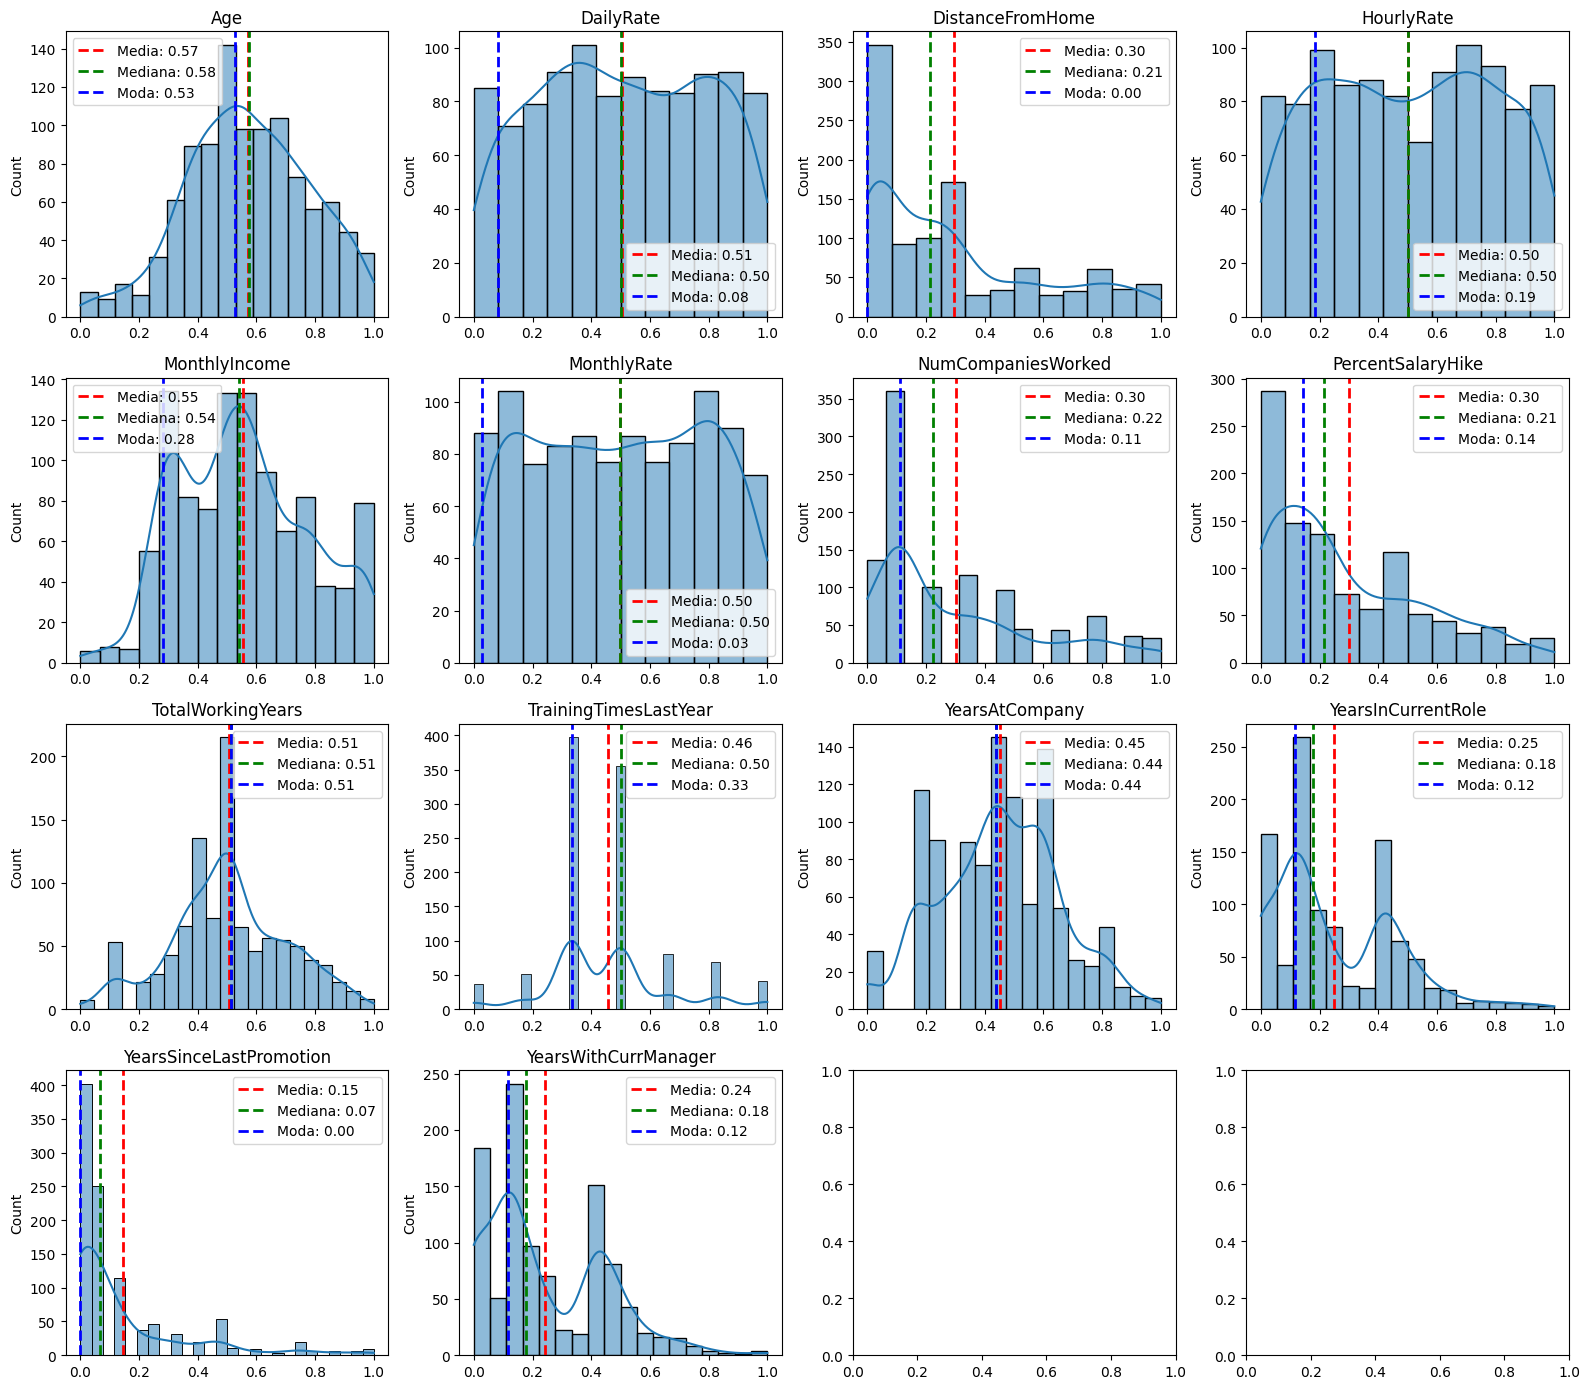

In [ ]:
# Creación figura y ejes.
fig, axes = plt.subplots(4, 4, figsize = (16, 14))
axes = axes.ravel()

# Iteración sobre columnas numéricas y creación histogramas.
for col, ax in zip(XtrainT[columnas_cuantitativas], axes):
    sns.histplot(XtrainT[col], ax = ax, kde = True)
    media = XtrainT[col].mean()
    mediana = XtrainT[col].median()
    moda = XtrainT[col].mode().values[0]  # Múltiples modas, se toma la primera.
    ax.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 2, label = f'Media: {media:.2f}')
    ax.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 2, label = f'Mediana: {mediana:.2f}')
    ax.axvline(moda, color = 'b', linestyle = 'dashed', linewidth = 2, label = f'Moda: {moda:.2f}')
    ax.legend()
    ax.set(title = f'{col}', xlabel = None)

# Ajuste diseño figura.
plt.tight_layout()
plt.show()

 ### **5.** Se aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.

In [ ]:
# Conjuntos de datos para aplicar las transformaciones.
ytrainT = ytrain.copy()
yvalT = yval.copy()
ytestT = ytest.copy()

In [ ]:
# Librería
from sklearn.preprocessing import LabelEncoder

# Instancia de LabelEncoder.
encoder = LabelEncoder()


# Variable OverTime - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Se aplica fit y transform a los datos de entrenamiento para evitar el filtrado de información.
XtrainT['OverTime'] = encoder.fit_transform(XtrainT['OverTime'])

# Se aplica solo transform a los datos de validación y prueba para evitar el filtrado de información.
XvalT['OverTime'] = encoder.transform(XvalT['OverTime'])
XtestT['OverTime'] = encoder.transform(XtestT['OverTime'])


# Variable Attrition - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Se aplica fit y transform a los datos de entrenamiento para evitar el filtrado de información.
ytrainT = pd.DataFrame(encoder.fit_transform(ytrainT), columns = ['Attrition'])

# Se aplica solo transform a los datos de validación y prueba para evitar el filtrado de información.
yvalT = pd.DataFrame(encoder.transform(yvalT), columns = ['Attrition'])
ytestT = pd.DataFrame(encoder.transform(ytestT), columns = ['Attrition'])

#### **A.** Se obtiene la distribución de las clases de la variable de salida “Attrition”. Con base a dicha distribución, ¿se puede considerar que hay un problema de datos no balanceados?

Si hay un problema de datos no balanceados, las categorías que se están analizando no están representadas de manera equitativa en el conjunto de datos. En otras palabras, una clase tiene muchas más instancias que la otra.

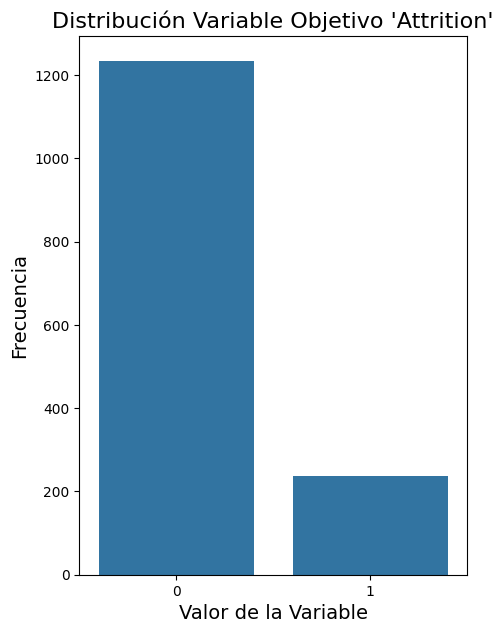

In [ ]:
# Unir los conjuntos de entrenamiento, validación y prueba en unos solo para graficar.
y_complete = pd.concat([ytrainT, yvalT, ytestT], axis = 0, ignore_index = True)

# Crear un gráfico de barras.
plt.figure(figsize = (5, 7))
sns.countplot(x = 'Attrition', data = y_complete)

# Configurar el título y etiquetas.
plt.title("Distribución Variable Objetivo 'Attrition'", fontsize = 16)
plt.xlabel('Valor de la Variable', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)

# Mostrar el gráfico.
plt.show()

 ### **6.** Se realiza una inspección de las variables ordinales y se determina qué transformaciones aplicarles, en caso de aplicar alguna. Se justifica la decisión tomada.

Como las variables ordinales ya están mapeadas en valores numéricos según las categorías ordinales según su orden, se decidió no aplicar transformaciones.

Se muestran gráficos del análisis.

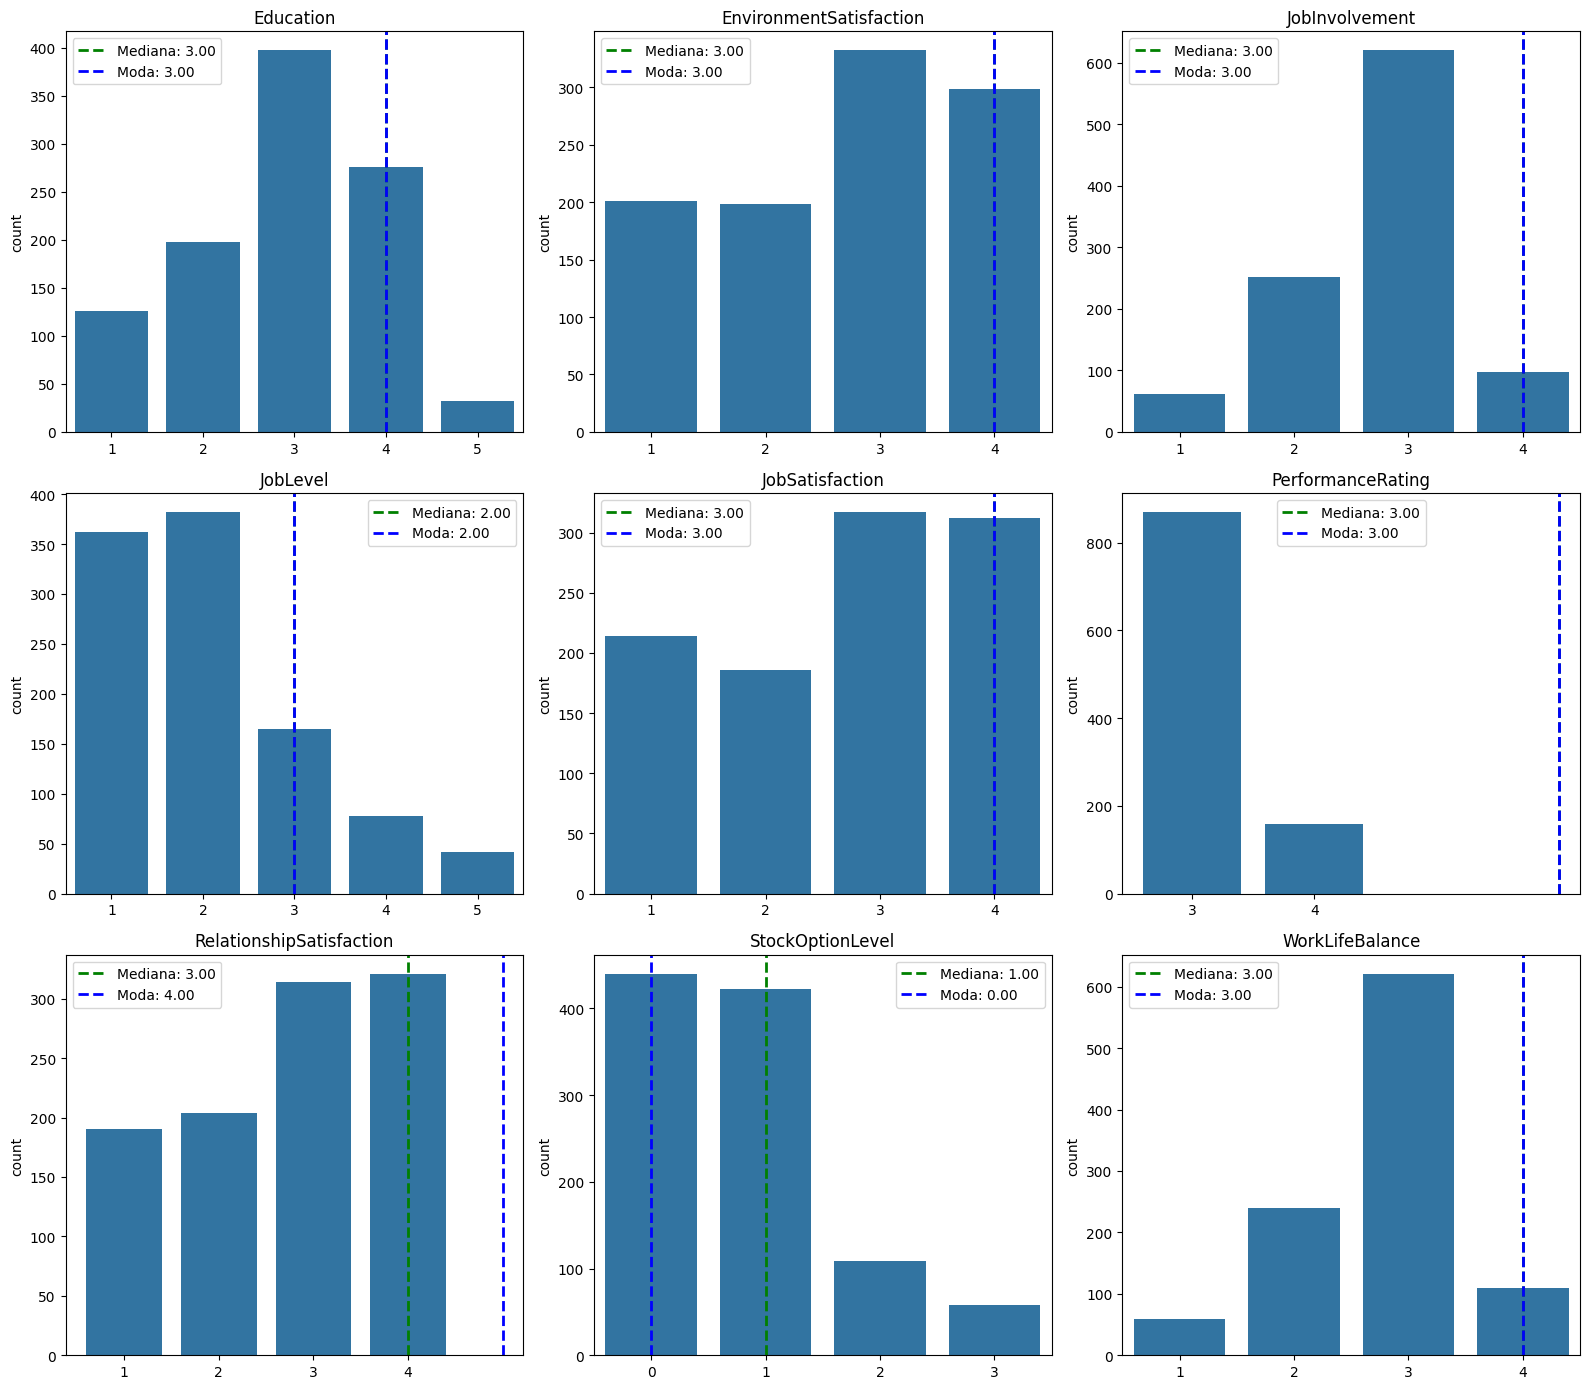

In [ ]:
# Variables categóricas ordinales.
columnas_ordinales = variables_categoricas_ordinales.columns

# Creación de figura y ejes.
fig, axes = plt.subplots(3, 3, figsize = (16, 14))
axes = axes.ravel()

# Iteración sobre columnas numéricas y creación gráficos de barras.
for col, ax in zip(XtrainT[columnas_ordinales], axes):
    sns.countplot(x = col, data = XtrainT, ax = ax)
    mediana = XtrainT[col].median()
    moda = XtrainT[col].mode().values[0]  # Múltiples modas, se toma la primera.
    ax.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 2, label = f'Mediana: {mediana:.2f}')
    ax.axvline(moda, color = 'b', linestyle = 'dashed', linewidth = 2, label = f'Moda: {moda:.2f}')
    ax.legend()
    ax.set(title = f'{col}', xlabel = None)

# Ajuste del diseño de la figura.
plt.tight_layout()
plt.show()

 ### **7.** Se obtiene la matriz de correlación de los factores obtenidos hasta el momento. Se incluye la variable “Attrition”.

In [ ]:
# Unión de variables características y objetivo en un solo data frame.
df_completo = pd.concat([XtrainT, ytrainT['Attrition']], axis = 1)

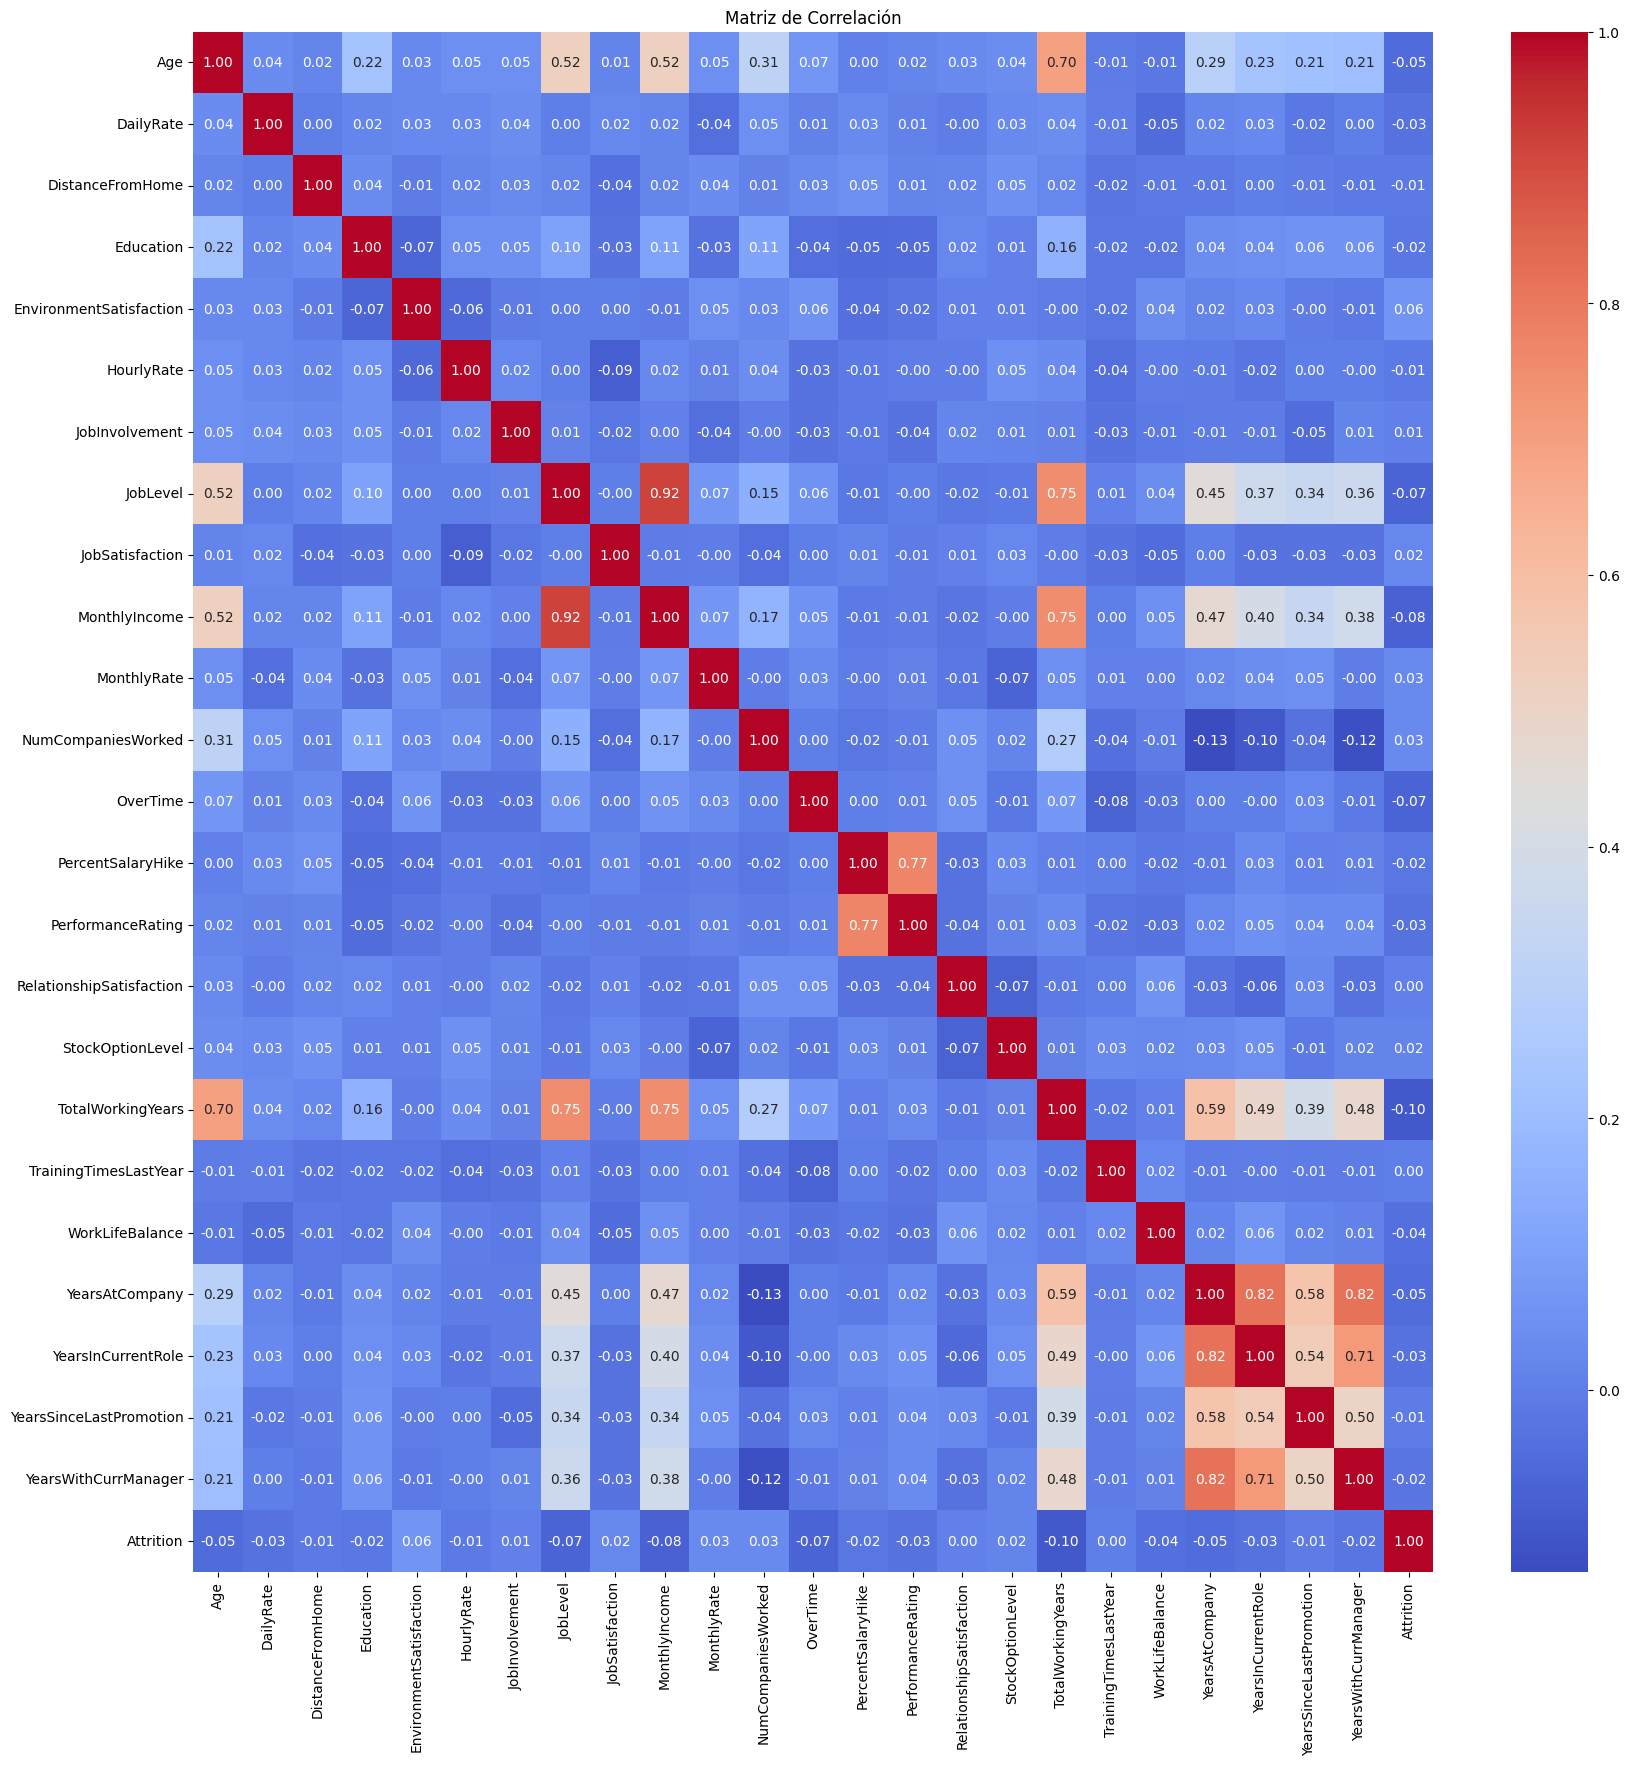

In [ ]:
# Calcula la matriz de correlación.
matriz_correalcion = df_completo.corr(numeric_only = True)

# Tamaño de la figura.
plt.figure(figsize = (20, 20))

# Matriz de correlación como un mapa de calor.
sns.heatmap(matriz_correalcion, annot = True, cmap = 'coolwarm', fmt = ".2f")

# Etiquetas y título.
plt.title('Matriz de Correlación')
plt.show()

#### **A.** Se indican las correlaciones positivas “fuertes” entre pares de factores que se encuentran dentro de la matriz.

In [ ]:
# Filtrar correlaciones positivas fuertes.
correlaciones_positivas_fuertes = matriz_correalcion[matriz_correalcion > 0.7]

# Mostrar correlaciones positivas fuertes.
print("Correlaciones Positivas Fuertes:")
print(correlaciones_positivas_fuertes.stack().sort_values(ascending = False))

Correlaciones Positivas Fuertes:
Age                       Age                         1.000000
NumCompaniesWorked        NumCompaniesWorked          1.000000
YearsWithCurrManager      YearsWithCurrManager        1.000000
YearsSinceLastPromotion   YearsSinceLastPromotion     1.000000
YearsInCurrentRole        YearsInCurrentRole          1.000000
YearsAtCompany            YearsAtCompany              1.000000
WorkLifeBalance           WorkLifeBalance             1.000000
TrainingTimesLastYear     TrainingTimesLastYear       1.000000
TotalWorkingYears         TotalWorkingYears           1.000000
StockOptionLevel          StockOptionLevel            1.000000
RelationshipSatisfaction  RelationshipSatisfaction    1.000000
PerformanceRating         PerformanceRating           1.000000
DailyRate                 DailyRate                   1.000000
PercentSalaryHike         PercentSalaryHike           1.000000
OverTime                  OverTime                    1.000000
Attrition             

#### **B.** Se indican las correlaciones negativas “fuertes” entre pares de factores que se encuentran dentro de la matriz.

In [ ]:
# Filtrar correlaciones negativas fuertes.
correlaciones_negativas_fuertes = matriz_correalcion[matriz_correalcion < -0.7]

# Mostrar correlaciones negativas fuertes.
print("\nCorrelaciones Negativas Fuertes:")
print(correlaciones_negativas_fuertes.stack().sort_values())


Correlaciones Negativas Fuertes:
Series([], dtype: float64)


 ### **8.** Se aplica la transformación get_dummies de Pandas a las variables nominales, evitando el filtrado de información y usando el argumento “drop_first” para generar “k-1” variables “dummies”, de las “k” que cada variable.

In [ ]:
# Lista de variables nominales.
columnas_nominales = XtrainT.select_dtypes(include = ['object']).columns.tolist()

# Aplica get_dummies solo al conjunto de entrenamiento.
XtrainT_dummies = pd.get_dummies(XtrainT[columnas_nominales], prefix = columnas_nominales, drop_first = True)
XtrainT = pd.concat([XtrainT, XtrainT_dummies], axis = 1)
XtrainT = XtrainT.drop(columnas_nominales, axis = 1)

# Aplica la misma transformación al conjunto de validación.
XvalT_dummies = pd.get_dummies(XvalT[columnas_nominales], prefix = columnas_nominales, drop_first = True)
XvalT = pd.concat([XvalT, XvalT_dummies], axis = 1)
XvalT = XvalT.drop(columnas_nominales, axis = 1)

# Aplica la misma transformación al conjunto de prueba.
XtestT_dummies = pd.get_dummies(XtestT[columnas_nominales], prefix = columnas_nominales, drop_first = True)
XtestT = pd.concat([XtestT, XtestT_dummies], axis = 1)
XtestT = XtestT.drop(columnas_nominales, axis = 1)

 ### **9.** Se usa la instrucción XtrainT.head().T,para desplegar los primeros registros de los datos de entrenamiento con todas las transformaciones realizadas hasta ahora.

 **NOTA:** Hasta aquí, los nombres de las variables deben seguir siendo los mismos: XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT.

In [ ]:
# Primeros registros conjunto de entrenamiento.
XtrainT.head().T

,853,435,587,1170,159
Age,0.044907,0.503446,0.881143,0.336773,0.528242
DailyRate,0.388252,0.840974,0.875358,0.349570,0.143266
DistanceFromHome,0.285714,0.500000,0.357143,0.035714,0.035714
Education,2.000000,1.000000,4.000000,3.000000,4.000000
EnvironmentSatisfaction,3.000000,2.000000,4.000000,4.000000,3.000000
HourlyRate,0.342857,0.371429,0.742857,0.814286,0.642857
JobInvolvement,3.000000,3.000000,3.000000,3.000000,3.000000
JobLevel,1.000000,3.000000,2.000000,1.000000,1.000000
JobSatisfaction,1.000000,3.000000,3.000000,4.000000,3.000000
MonthlyIncome,0.310816,0.871517,0.381228,0.314471,0.265788


#### **A.** Se despliegan las dimensiones de los conjuntos XtrainT, XvalT y XtestT.

In [ ]:
# Dimensiones de los conjuntos.
print("Dimensiones de XtrainT:", XtrainT.shape)
print("Dimensiones de XvalT:", XvalT.shape)
print("Dimensiones de XtestT:", XtestT.shape)

Dimensiones de XtrainT: (1029, 42)
Dimensiones de XvalT: (220, 42)
Dimensiones de XtestT: (221, 42)


# **Parte 2**. Análisis exploratorio entre factores

### **10.** Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A manera de ejemplos, se verán algunas de dichas relaciones gráficamente que pueden aportar información al problema que se enfrenta.

#### **A.** Variables “Age” y “Attrition”.


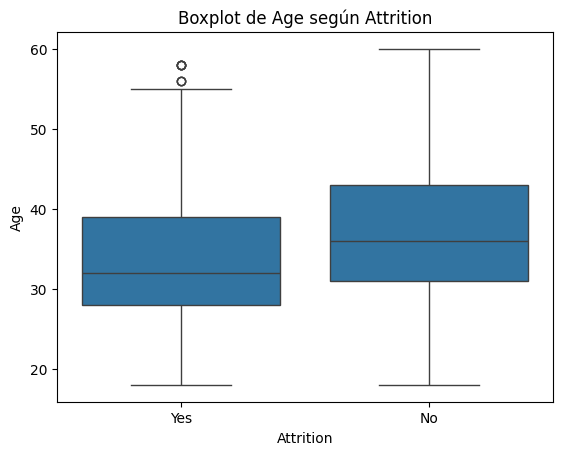

In [ ]:
# Boxplot
sns.boxplot(x = 'Attrition', y = 'Age', data = df)
plt.title('Boxplot de Age según Attrition')
plt.show()

#### **B.** Variables “Department” y “Attrition”.

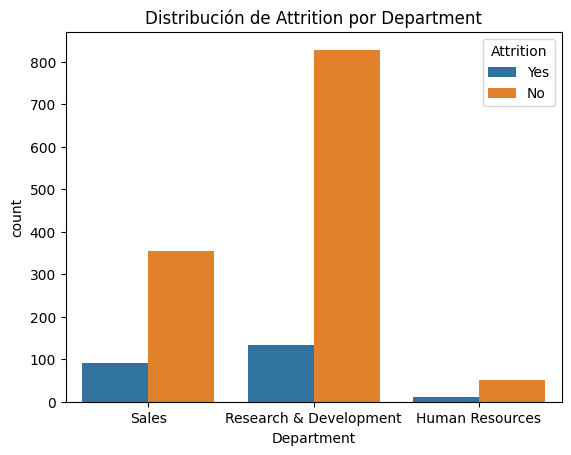

In [ ]:
# Countplot
sns.countplot(x = 'Department', hue = 'Attrition', data = df)
plt.title('Distribución de Attrition por Department')
plt.show()

#### **C.** Variables “Gender” y “Attrition”.

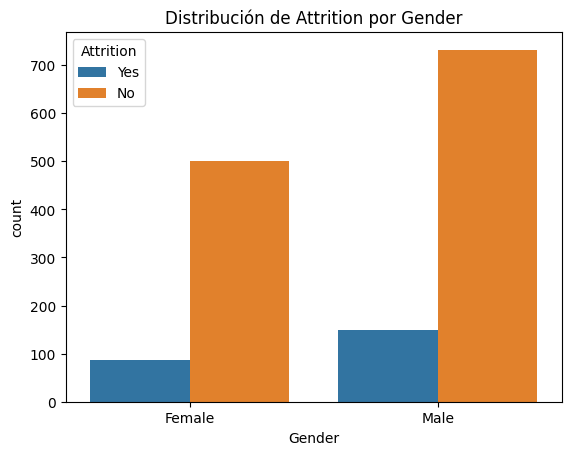

In [ ]:
# Countplot.
sns.countplot(x = 'Gender', hue = 'Attrition', data = df)
plt.title('Distribución de Attrition por Gender')
plt.show()

#### **D.** Otras relaciónes que se consideran relevantes.

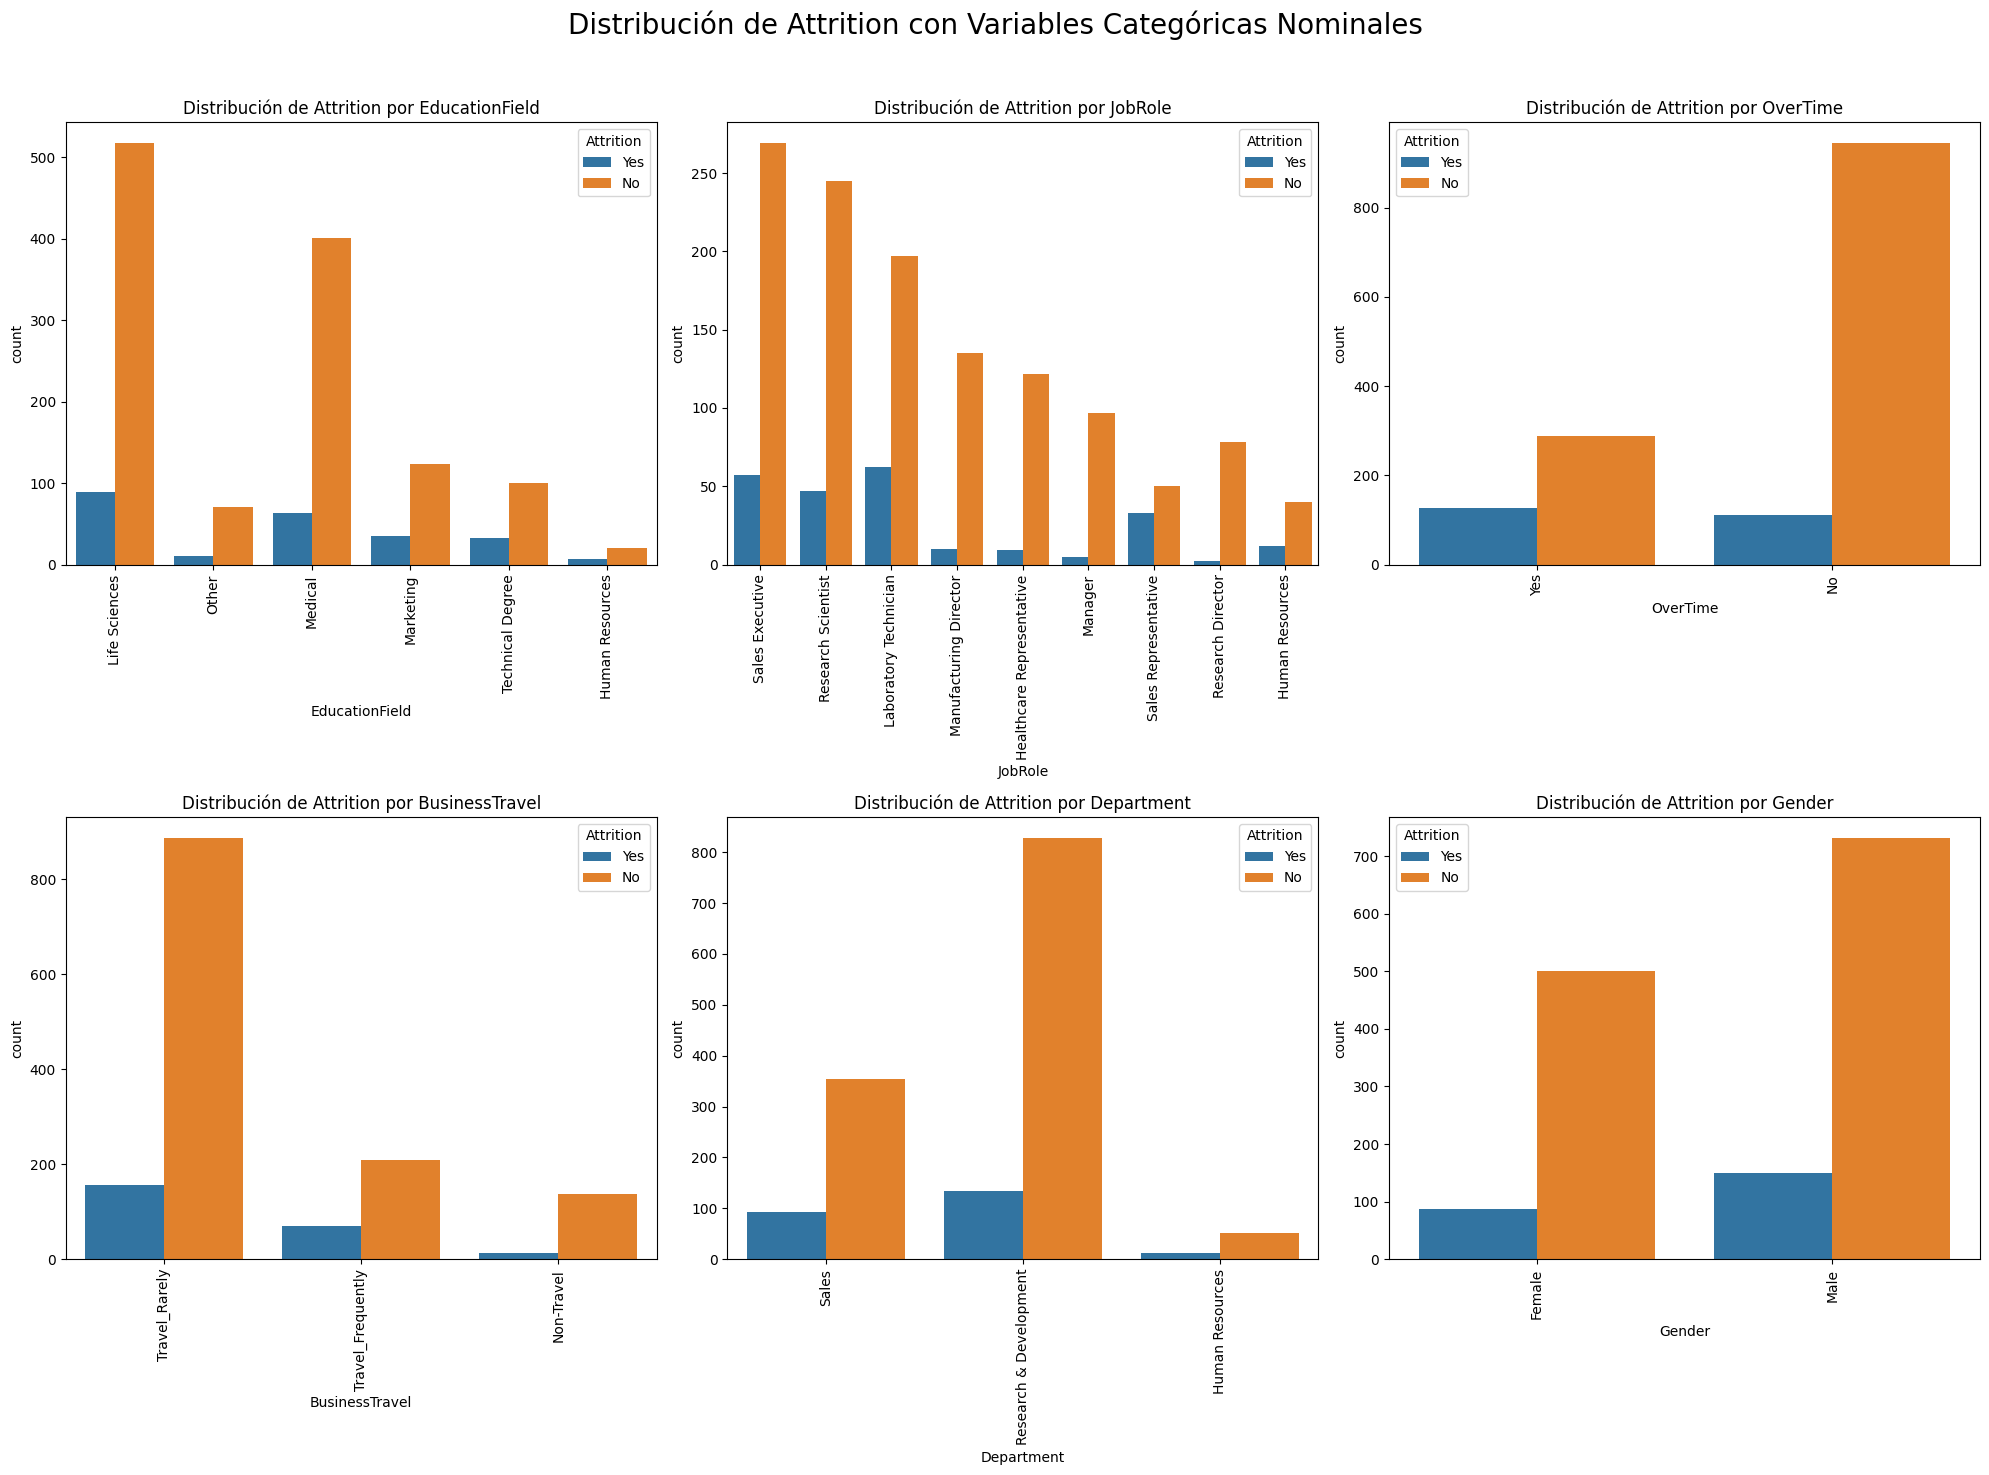

In [ ]:
# Lista de columnas categóricas nominales.
columnas_categoricas_nominales = ['EducationField', 'JobRole', 'OverTime', 'BusinessTravel', 'Department', 'Gender']

# Figura con 2 filas y 3 columnas para los subgráficos.
fig, axes = plt.subplots(2, 3, figsize = (20, 15))

# Iterar sobre las columnas categóricas y sus correspondientes subgráficos.
for col, ax in zip(columnas_categoricas_nominales, axes.flatten()):
    sns.countplot(x = col, hue = 'Attrition', data = df, ax = ax)

    # Configuraciones del subgráfico.
    ax.set_title(f'Distribución de Attrition por {col}')
    ax.legend(title = 'Attrition')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# Título general de la figura.
fig.suptitle('Distribución de Attrition con Variables Categóricas Nominales', fontsize = 20)

# Ajustes de diseño para evitar superposiciones.
plt.tight_layout(rect = [0, 0, 1, 0.96])

# Mostrar figura.
plt.show()

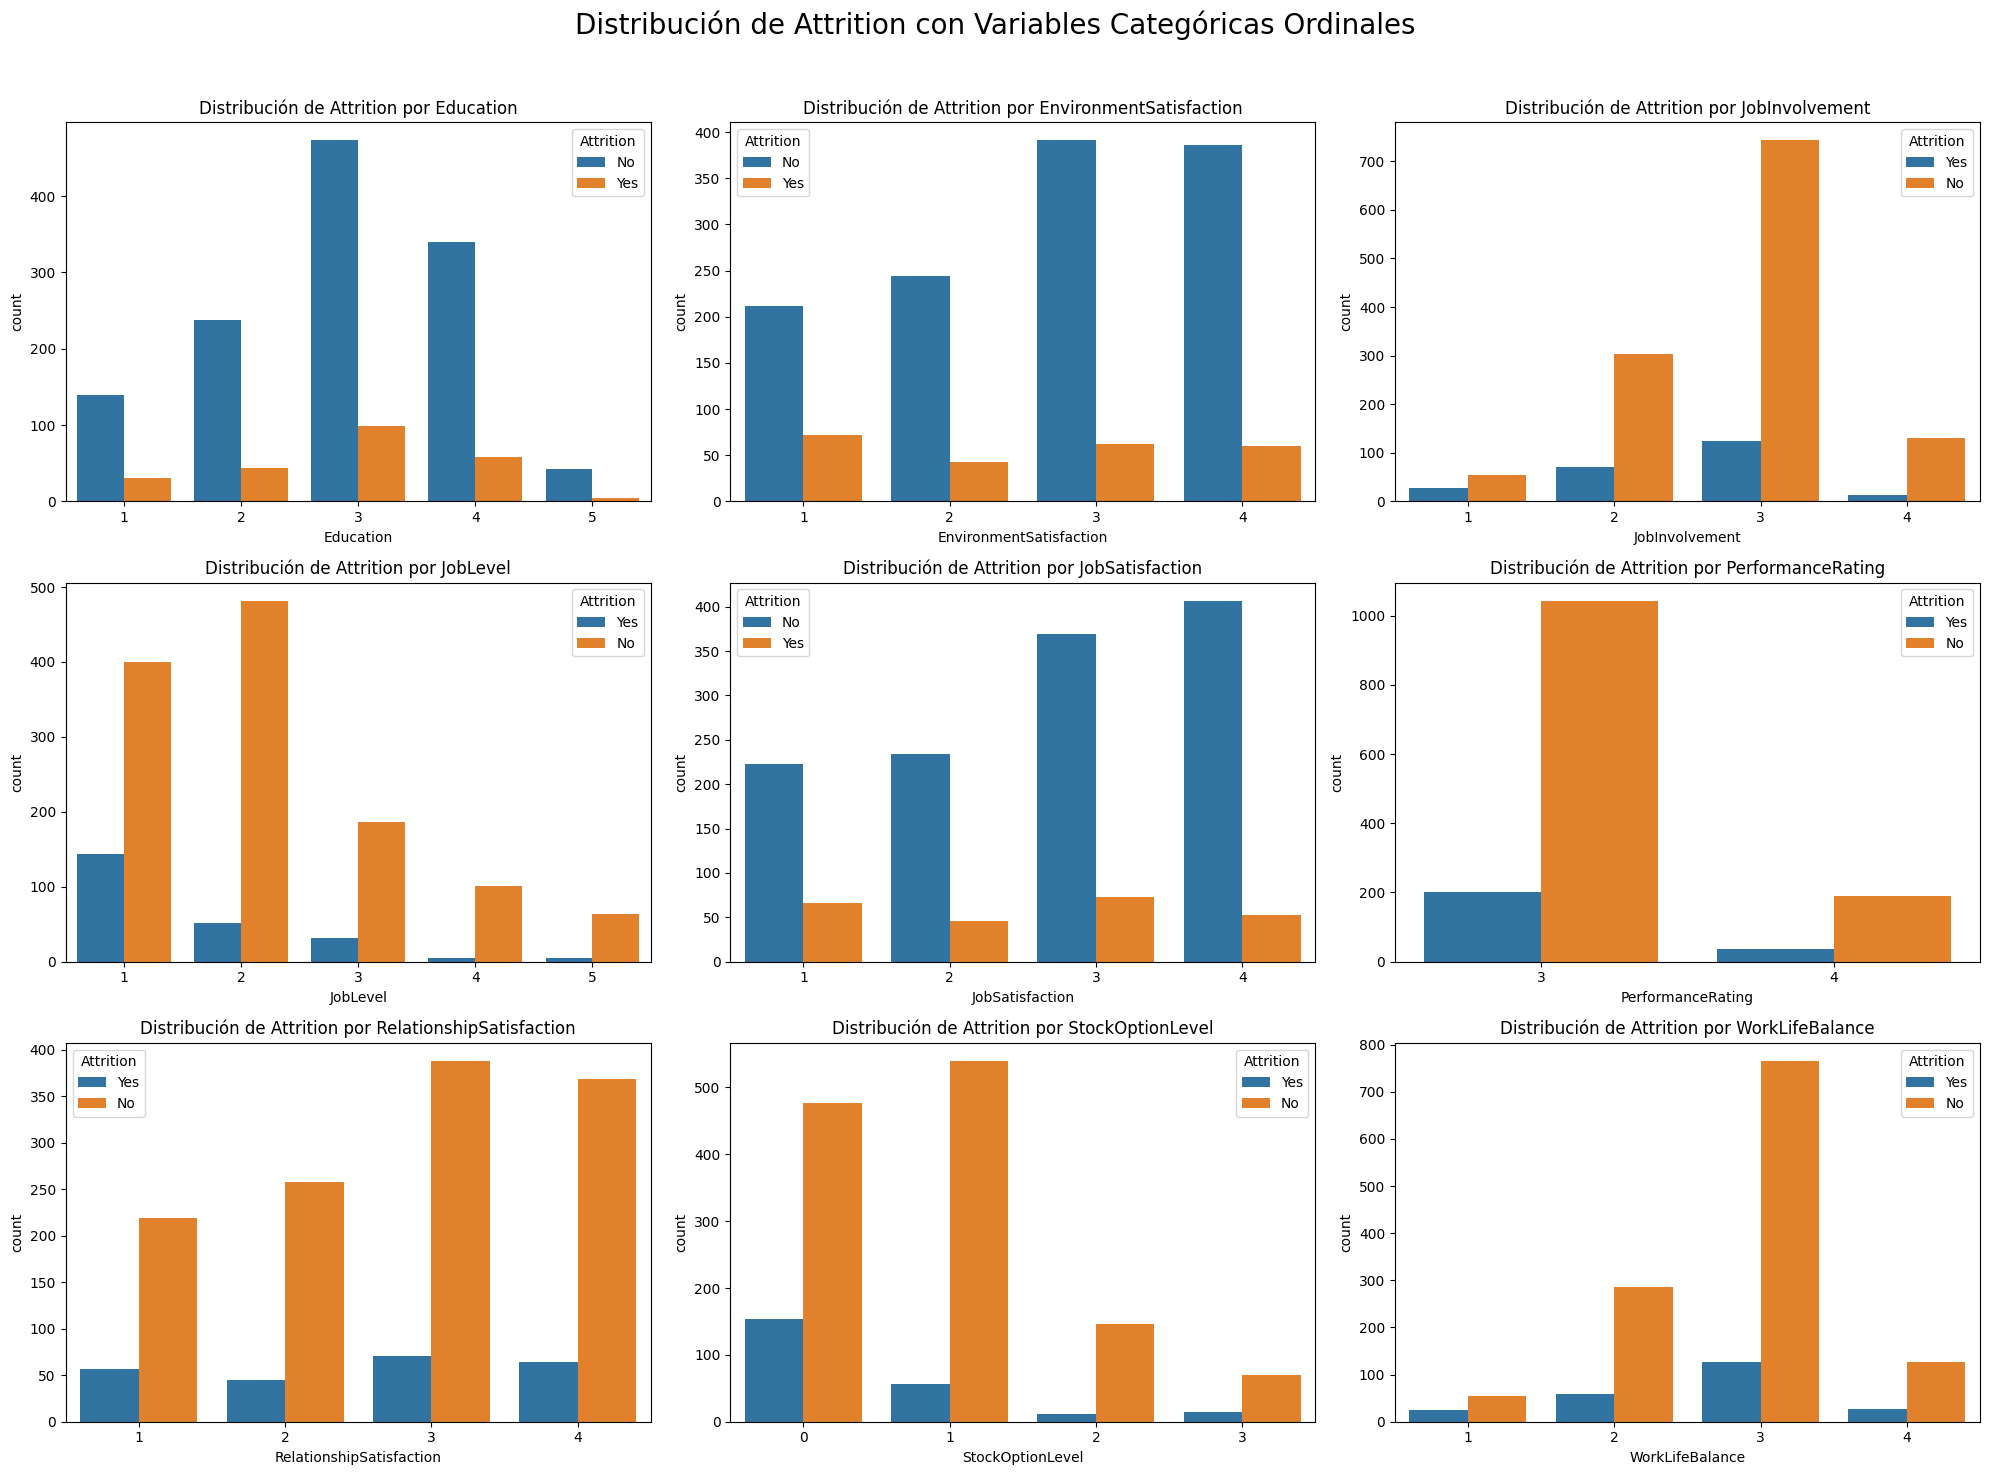

In [ ]:
# Lista de columnas categóricas ordinales.
columnas_categoricas_ordinales = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                                   'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                                   'StockOptionLevel', 'WorkLifeBalance']

# Figura con 3 filas y 3 columnas para los subgráficos.
fig, axes = plt.subplots(3, 3, figsize = (20, 15))

# Iterar sobre las columnas categóricas ordinales y sus correspondientes subgráficos.
for col, ax in zip(columnas_categoricas_ordinales, axes.flatten()):
    sns.countplot(x = col, hue = 'Attrition', data = df, ax = ax)

    # Configuraciones del subgráfico.
    ax.set_title(f'Distribución de Attrition por {col}')
    ax.legend(title = 'Attrition')

# Título general de la figura.
fig.suptitle('Distribución de Attrition con Variables Categóricas Ordinales', fontsize = 20)

# Ajustes de diseño para evitar superposiciones.
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar figura.
plt.show()

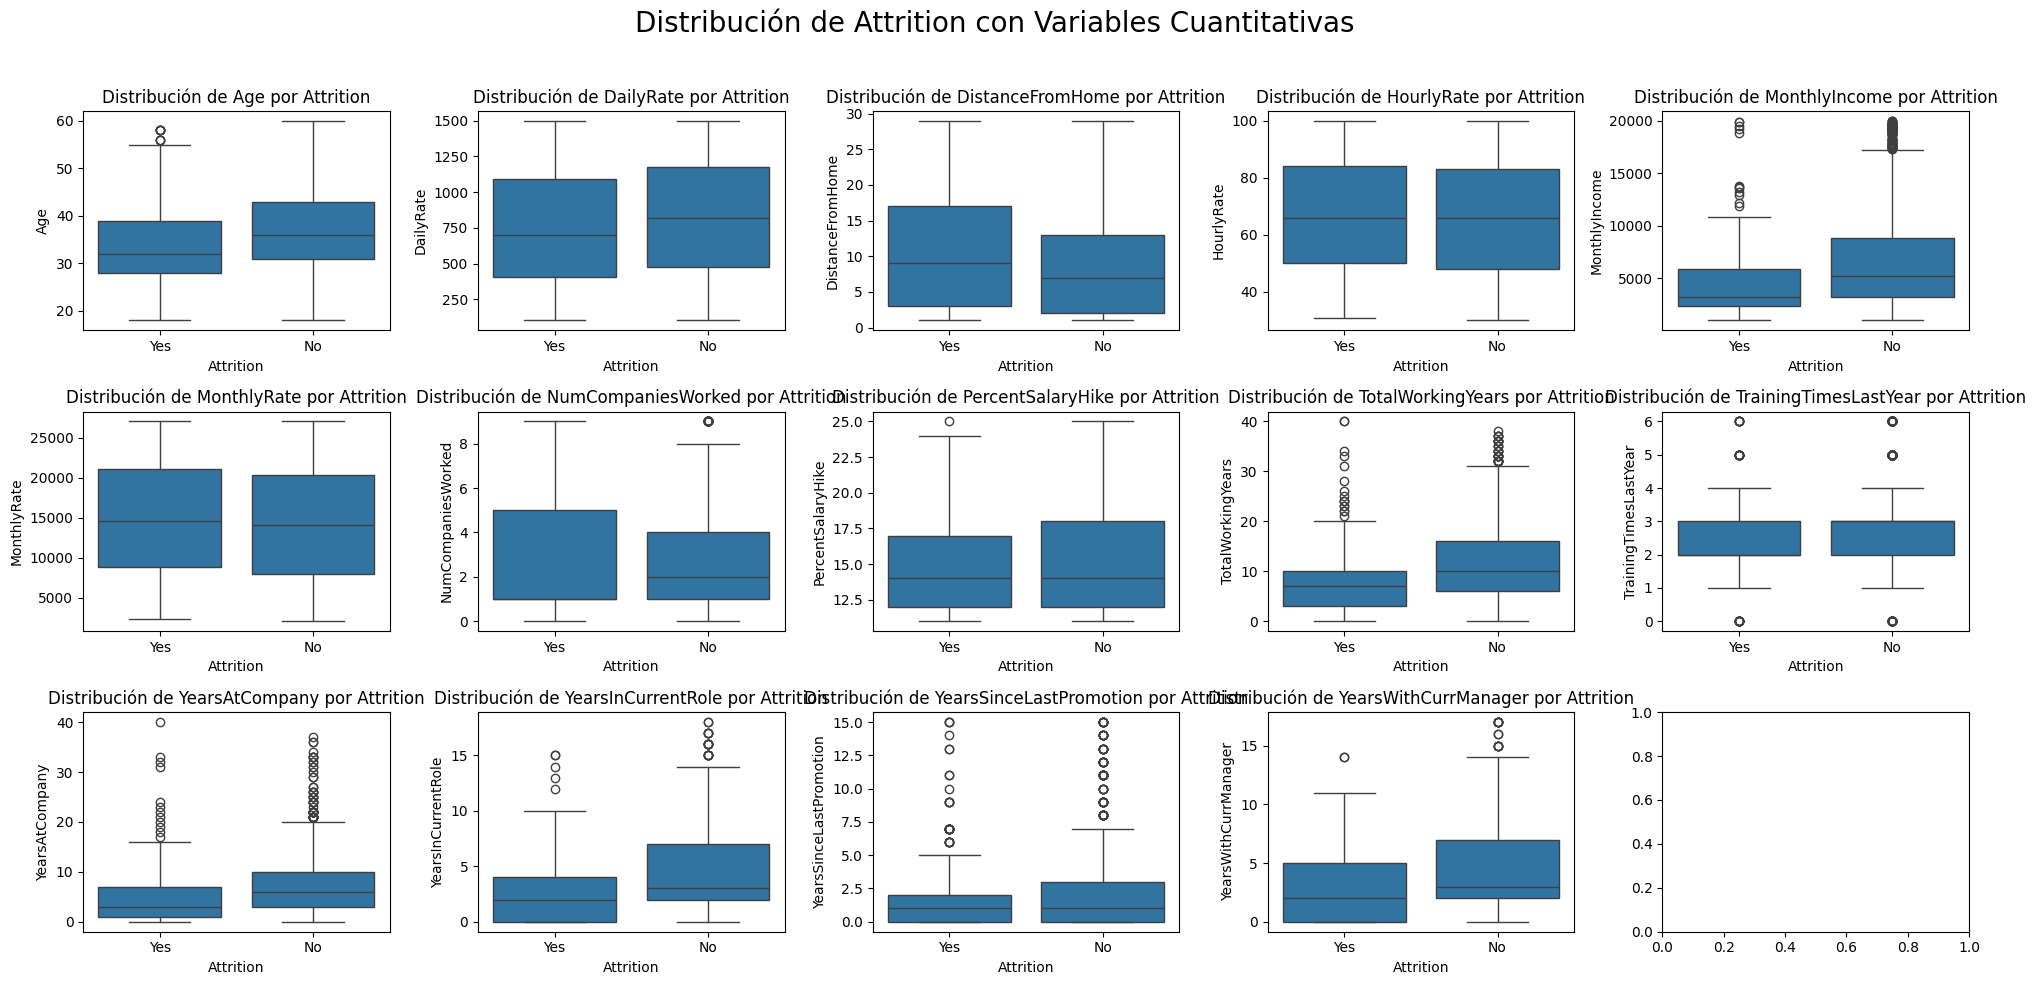

In [ ]:
# Lista de columnas cuantitativas.
columnas_cuantitativas = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

# Figura con 3 filas y 5 columnas para los subgráficos.
fig, axes = plt.subplots(3, 5, figsize = (20, 10))

# Iterar sobre las columnas y crear los boxplots.
for col, ax in zip(columnas_cuantitativas, axes.flatten()):
    sns.boxplot(x='Attrition', y = col, data = df, ax = ax)
    ax.set_title(f'Distribución de {col} por Attrition')

# Añadir un título general a la figura.
fig.suptitle('Distribución de Attrition con Variables Cuantitativas', fontsize = 20)

# Ajustar el diseño de la figura
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### **E.** En base a los gráficos obtenidos se incluyen conclusiones al respecto.

En base a los gráficos se puede concluir que las variables que más parecen afectar el abandono del trabajo por parte de los empleados son:
'OverTime', la clasificación más baja de 'JobInvolment' y la clasificación más baja de 'WorkLifeBalance', ya que proporcionalmente más del 50% de los empleados que trabajan tiempo extra abandonan el trabajo, más del 50% de los empleados con el menor involucramiento terminan abandonando el trabajo y más del 50% los empleados con la evaluación más baja del balance de vida y trabajo también terminan abandonando el trabajo.


Adicionalmente, los empleados con menor 'Age' (edad) tienden a abandonar más el trabajo. Sumado a lo anterior, los empleados con menor 'TotalWorkingYears' (menor tiempo en la vida laboral) tienden a abandonar más el trabajo.


Además, el departamento de 'Sales' (ventas) tiene más abandonos de trabajo proporcionalmente.

# **Parte 3**. Modelado

### **11.** Se utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.

In [ ]:
# Convertir a array de una dimensión (1D).
ytrainT = np.ravel(ytrainT)

In [ ]:
# Librería
from sklearn.linear_model import LogisticRegression

# Modelo de regresión logística.
model = LogisticRegression(random_state = 42, max_iter = 1000)

# Entrenar el modelo con el conjunto de entrenamiento.
model.fit(XtrainT, ytrainT)

# Predicciones con el conjunto de validación.
y_train_pred = model.predict(XtrainT)
y_val_pred = model.predict(XvalT)

#### **A.** Se despliegan los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Cálculo de accuracy.
accuracy_train = accuracy_score(ytrainT, y_train_pred)
accuracy_val = accuracy_score(yvalT, y_val_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.9038
Accuracy en el conjunto de validación: 0.8864


#### **B.** Se utilizan los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

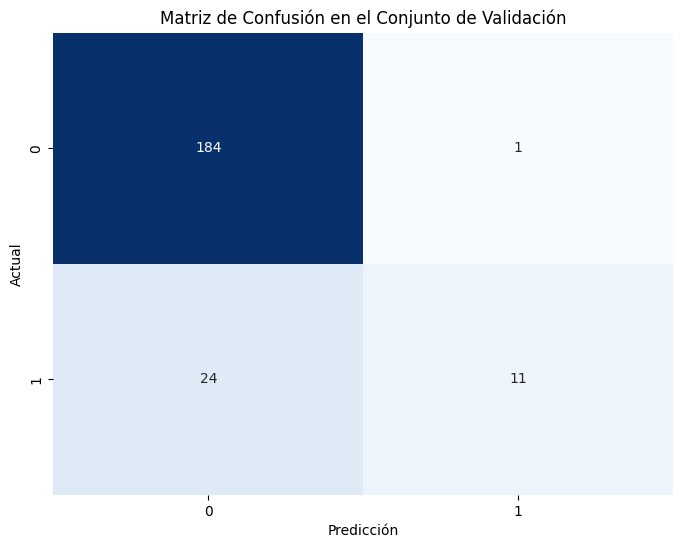


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       185
           1       0.92      0.31      0.47        35

    accuracy                           0.89       220
   macro avg       0.90      0.65      0.70       220
weighted avg       0.89      0.89      0.86       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_pred))

#### **C.** En base a los resultados, ¿se puede decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Se justifica la respuesta.

Se puede decir que el modelo está subentrenado (underfitting), ya que la matriz de confusión muestra un alto número de Falsos Negativos y bajos Verdaderos Positivos, lo cual puede ser un indicativo de un problema de subentrenamiento, donde la clase positiva la está clasificando incorrectamente como negativa (Falsos Negativos) debido a que el modelo no ha aprendido adecuadamente la complejidad de los datos, lo cual se puede ver reflejado en el recall relativamente bajo para la clase 1 (0.31 o 31%).

El modelo parece tener un buen rendimiento para la clase 0, pero el bajo recall para la clase 1 es una señal de que podría ser necesario mejorar la capacidad del modelo para identificar instancias de la clase 1.



#### **D.** ¿Se considera que hay un problema desbalanceado? Se justifica la respuesta.

Si, se condidera que hay un problema desbalanceado, ya que hay un número significativamente mayor de casos de la clase 0 (negativa) en comparación con la clase 1 (positiva).

El problema de desbalnceo se puede notar al observar la diferencia en el recall entre las dos clases, lo cual  puede llevar a que el modelo se incline hacia la clase mayoritaria y tenga dificultades para generalizar correctamente a la clase minoritaria.

#### **E.** Se interpreta el valor numérico de la “precision” de la clase positiva.

La precision para la clase positiva (clase 1) es 0.92. Esto significa que el 92% de las instancias que el modelo predijo como pertenecientes a la clase positiva realmente pertenecen a esa clase. El restante 8% representa Falsos Positivos.

#### **F.** Se interpreta el valor numérico del “recall” de la clase positiva.

El recall para la clase 1 (positiva) es 0.31. Esto significa que el modelo está capturando solo el 31% de todas las instancias reales que pertenecen a la clase positiva. En otras palabras, el modelo tiene dificultades para identificar y recuperar la totalidad de las instancias positivas presentes en el conjunto de datos, las cuales las está clasificando como negativas (Falsos Negativos).

#### **G.** En base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” se considera que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambas al mismo tiempo y se debiera sacrificar una de ellas, ¿cuál sería la que se buscaría que fuera más cercana a cero? Se justifica la respuesta con base al contexto del problema.

Si el costo de perder a un empleado valioso es alto y se prefiere prevenir falsas alarmas (evitar predecir erróneamente que un empleado se irá cuando no es así), entonces se daría más importancia a la precisión. En este caso, se sacrificaría el recall.

Si, por otro lado, hay la necesidad de identificar a todos los empleados que realmente dejarán la empresa, entonces se daría más importancia al recall. En este caso, se sacrificaría la precisión.

### **12.** Se utilizan los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.

In [ ]:
# Librerías
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista de valores de k (número de vecinos).
k_values = [1, 3, 5, 7, 9]

# Variables para almacenar los mejores resultados.
best_k = None
best_accuracy = 0

# Entrenamiento y evaluación con validación cruzada para diferentes valores de k.
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Validación cruzada para evaluar el modelo.
    cv_scores = cross_val_score(knn_model, XtrainT, ytrainT, cv = 5)

    # Accuracy promedio en validación cruzada.
    mean_accuracy = cv_scores.mean()
    print(f'k = {k}, Cross-Validation Accuracy: {mean_accuracy}')

    # Actualización del mejor modelo si se encuentra un mejor rendimiento.
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

# Mejor valore de k (número vecinos).
print(f'\nMejor k (número vecinos): {best_k}')

# Entrenamiento del modelo con el mejor valor de k encontrado.
best_knn_model = KNeighborsClassifier(n_neighbors = best_k)
best_knn_model.fit(XtrainT, ytrainT)

# Predicciones en conjuntos de entrenamiento y validación.
y_train_pred = best_knn_model.predict(XtrainT)
y_val_pred = best_knn_model.predict(XvalT)

k = 1, Cross-Validation Accuracy: 0.792986028889415
k = 3, Cross-Validation Accuracy: 0.8250532796590102
k = 5, Cross-Validation Accuracy: 0.8454653090220223
k = 7, Cross-Validation Accuracy: 0.8435330333885863
k = 9, Cross-Validation Accuracy: 0.840620412029363

Mejor k (número vecinos): 5


#### **A.** Se despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación.
accuracy_train = accuracy_score(ytrainT, y_train_pred)
accuracy_val = accuracy_score(yvalT, y_val_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.8698
Accuracy en el conjunto de validación: 0.8455


#### **B.** Se utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

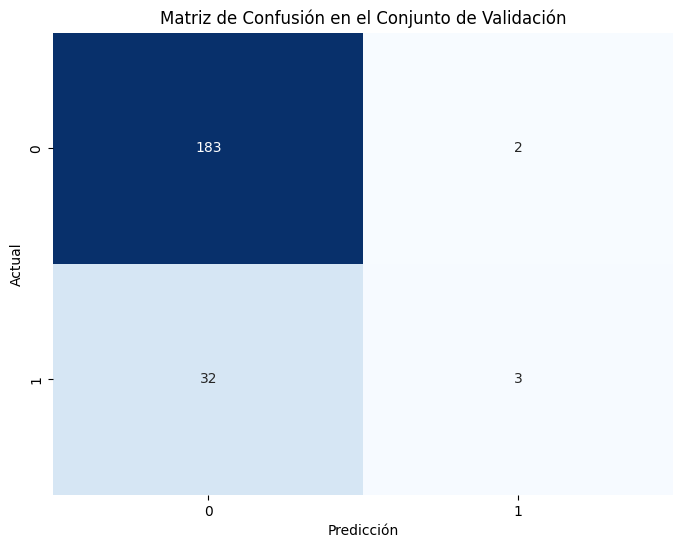


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       185
           1       0.60      0.09      0.15        35

    accuracy                           0.85       220
   macro avg       0.73      0.54      0.53       220
weighted avg       0.81      0.85      0.79       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_pred))

#### **C.** Con base a estos resultados, ¿se puede decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Se justifica la respuesta.





Se puede decir que el modelo está subentrenado, ya que la matriz de confusión muestra un alto número de Falsos Negativos y bajos Verdaderos Positivos, lo cual puede ser un indicativo de un problema de subentrenamiento, ya que el modelo no ha aprendido adecuadamente la complejidad de los datos. Sin embargo, el modelo tiene dificultades para clasificar porque los casos positivos son una clase minoritaria y necesita ajustarse el desbalanceo para mejorar su rendimiento en esta clase específica.


#### **D.** Se interpreta el valor numérico de la “precision” de la clase positiva.

La precisión para la clase positiva (clase 1) es 0.60. Esto significa que, de todas las instancias que el modelo predijo como positivas, el 60% de esas predicciones fueron correctas. El restante 40% representa Falsos Positivos.

#### **E.** Se interpreta el valor numérico del “recall” de la clase positiva.

El recall para la clase positiva es 0.09 o 9%. Esto indica que de todos los casos reales positivos, el modelo pudo identificar correctamente solo alrededor del 9%. El recall de la clase positiva muestra un bajo rendimiento en la capacidad del modelo para capturar Verdaderos Positivos.

#### **F.** Se comparan los resultados con los del modelo de Regresión Logística y se escriben conclusiones.

El primer modelo de Regresión Logística exhibe una mejora significativa en términos de precisión y recall para la clase positiva en comparación con el modelo de vecinos más cercanos (kNN). A pesar de la diferencia, ambos modelos mantienen en niveles relativamente bajos la métrica de recall. Esta métrica baja se pueden atribuir al desbalance que se presenta en las diferentes clases, lo cual genera que el modelo no pueda ser entrenado de la mejor manera posible y no obtengan las predicciones correctas para todas las clases, en especial la minoritaria.

# **Parte 4**. Balanceo de Clases

### **13.** Se utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los valores de los hiperparámetros que se consideran más adecuados para obtener un modelo no sobreentrenado.

In [ ]:
# Librería
from sklearn.linear_model import LogisticRegression

# Se define el peso para cada clase.
# La variable 'Attritiion' tien 1233 casos negativos y 237 casos positivos.
# 1233 / 237 = 5.202531 -> 5
# 1 Negativo, 5 Positivos
class_weights = {0: 1, 1: 5}

# Se aumenta el número máximo de iteraciones y usa 'saga' como solver.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

# Entrenamiento del modelo.
model.fit(XtrainT, ytrainT)

# Predicciones en el conjunto de entrenamiento y validación.
y_train_pred = model.predict(XtrainT)
y_val_pred = model.predict(XvalT)

#### **A.** Se despliegan los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación.
accuracy_train = accuracy_score(ytrainT, y_train_pred)
accuracy_val = accuracy_score(yvalT, y_val_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.8105
Accuracy en el conjunto de validación: 0.8091


#### **B.** Se utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

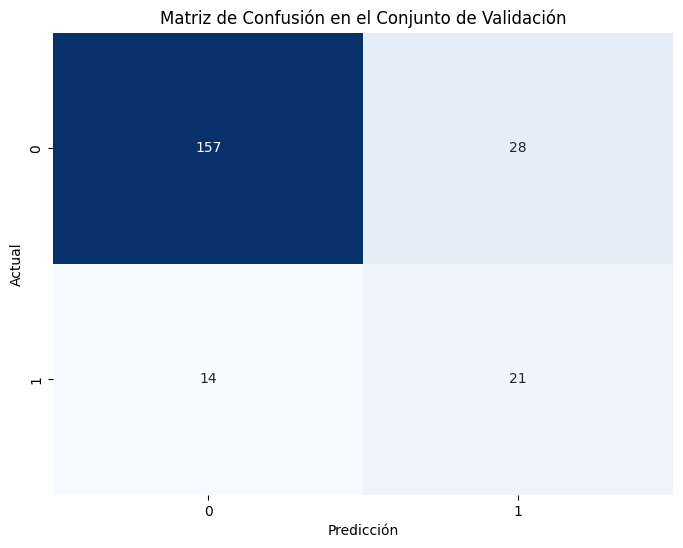


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       185
           1       0.43      0.60      0.50        35

    accuracy                           0.81       220
   macro avg       0.67      0.72      0.69       220
weighted avg       0.84      0.81      0.82       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_pred))

#### **C.** Se comparan los resultados con los modelos anteriores y se escriben las conclusiones.

Los resultados de este último modelo, LogisticRegression() utilizando “class_weight”, mejora considerablemente el recall de la clase positiva debido al argumento “class_weight”.

Los modelos evaluados tuvieron las siguientes métricas para la clase positiva, la cual es la clase desbalanceada:
  1. El modelo LogisticRegression() utilizado previamente tuvo un precisión de 0.92 y un recall de 0.31.
  2. El modelo KNeighborsClassifier() tuvo una precisión de 0.60 y un recall de 0.09.
  3. El modelo LogisticRegression() con uso del argumento “class_weight” tuvo una precisión de 0.43 y un recall de 0.60.

De los modelos analizados el modelo 3 es el que tiene un mejor balance entre las métricas de precisión y recall.

### **14.** Se utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que se consideran más adecuados para obtener el mejor modelo posible.


In [ ]:
pip install -U imbalanced-learn

In [ ]:
# Librerías
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Instancia de SMOTE.
smote = SMOTE(random_state = 42)

# Se aplica SMOTE solo al conjunto de entrenamiento.
Xtrain_resampled, ytrain_resampled = smote.fit_resample(XtrainT, ytrainT)

# Se asegura de que sea una Serie y luego un array 1D.
ytrain_resampled = ytrain_resampled.squeeze()

# Se define el peso para cada clase.
class_weights = {0: 1, 1: 5}

# Se configura el modelo de regresión logística.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

# Se entrena el modelo con los datos de entrenamiento aumentados por SMOTE.
model.fit(Xtrain_resampled, ytrain_resampled)

# Se realizan las predicciones en el conjunto de entrenamiento y validación.
y_train_pred = model.predict(XtrainT)
y_val_pred = model.predict(XvalT)

#### **A.** Se despliegan los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrainT, y_train_pred)
accuracy_val = accuracy_score(yvalT, y_val_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.6793
Accuracy en el conjunto de validación: 0.6409


#### **B.** Se utilizan los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

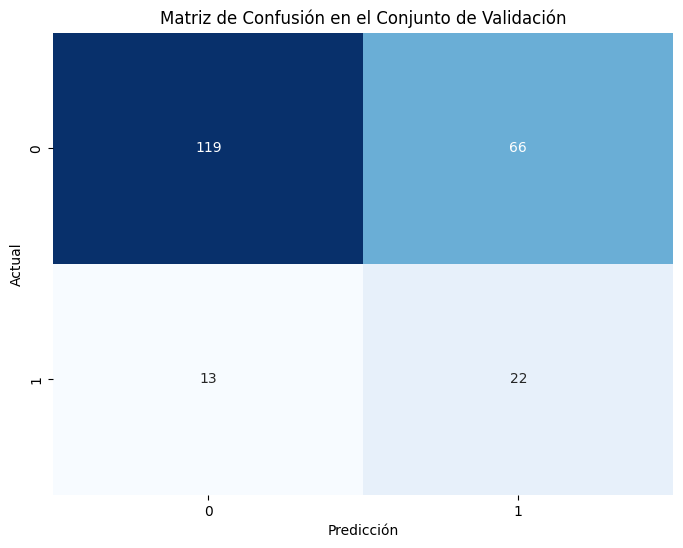


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       185
           1       0.25      0.63      0.36        35

    accuracy                           0.64       220
   macro avg       0.58      0.64      0.55       220
weighted avg       0.80      0.64      0.69       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_pred))

#### **C.** Se comparan los resultados con los modelos anteriores y se escriben conclusiones.

A diferencia de los modelos anteriores, este modelo es más sensible a la clase positiva, sin embargo, tiene una precisión baja, lo que se refleja en el número significativamente elevado de falsos positivos.

La clase positiva o 1 tiene un recall más alto, lo cual indica que el modelo es más efectivo para capturar la clase positiva o 1, pero la baja precisión indica que hace muchas falsas predicciones positivas.

### **15.** Se aplica alguno de los modelos combinados de sub y sobre entrenamiento y se reporta los resultados del mejor modelo que se ha obtenido. Se compara con los anteriores y se incluyen conclusiones.

En los siguiente dos modelos se implementan por separado en cada modelo los métodos SMOTEENN y SMOTETomek para poder compara los resultados con todos los modelos anteriores y poder comparar los resultados y obtener conclusiones.

**Las conclusiones de los modelos se muestran al final de este punto 15.**

In [ ]:
# Librerías
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression

# Instancia de SMOTEENN
smoteenn = SMOTEENN(random_state = 42)

# Se aplica SMOTEENN al conjunto de entrenamiento.
Xtrain_resampled, ytrain_resampled = smoteenn.fit_resample(XtrainT, ytrainT)

# Se asegura de que sea una Serie y luego un array 1D.
ytrain_resampled = ytrain_resampled.squeeze()

# Se define el peso para cada clase.
class_weights = {0: 1, 1: 5}

# Se configura el modelo de regresión logística.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

# Se entrena el modelo con los datos de entrenamiento aumentados por SMOTEENN.
model.fit(Xtrain_resampled, ytrain_resampled)

# Se realizan las predicciones en el conjunto de entrenamiento y validación.
y_train_pred = model.predict(XtrainT)
y_val_pred = model.predict(XvalT)

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrainT, y_train_pred)
accuracy_val = accuracy_score(yvalT, y_val_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.5471
Accuracy en el conjunto de validación: 0.5000


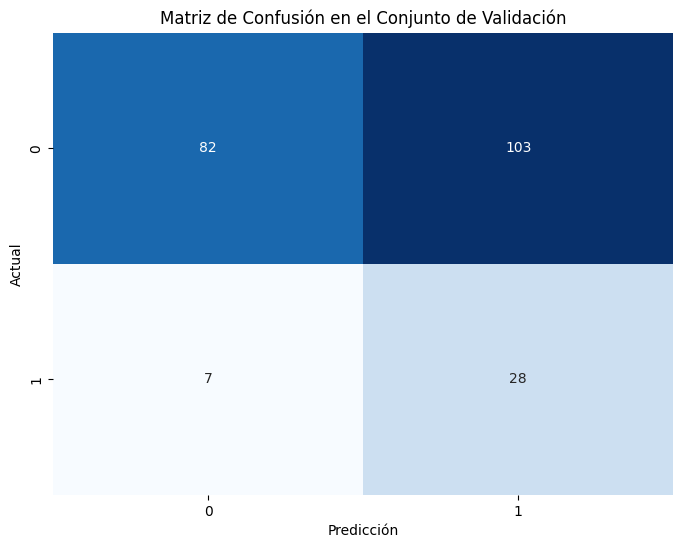


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.92      0.44      0.60       185
           1       0.21      0.80      0.34        35

    accuracy                           0.50       220
   macro avg       0.57      0.62      0.47       220
weighted avg       0.81      0.50      0.56       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_pred))

In [ ]:
# Librerías
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression

# Instancia de SMOTETomek
smote_tomek = SMOTETomek(random_state = 42)

# Se aplica SMOTETomek al conjunto de entrenamiento.
Xtrain_resampled, ytrain_resampled = smote_tomek.fit_resample(XtrainT, ytrainT)

# Se asegura de que sea una Serie y luego un array 1D.
ytrain_resampled = ytrain_resampled.squeeze()

# Se define el peso para cada clase.
class_weights = {0: 1, 1: 5}

# Se configura el modelo de regresión logística.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

# Se entrena el modelo con los datos de entrenamiento aumentados por SMOTETomek.
model.fit(Xtrain_resampled, ytrain_resampled)

# Se realizan las predicciones en el conjunto de entrenamiento y validación.
y_train_pred = model.predict(XtrainT)
y_val_pred = model.predict(XvalT)

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrainT, y_train_pred)
accuracy_val = accuracy_score(yvalT, y_val_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.6793
Accuracy en el conjunto de validación: 0.6409


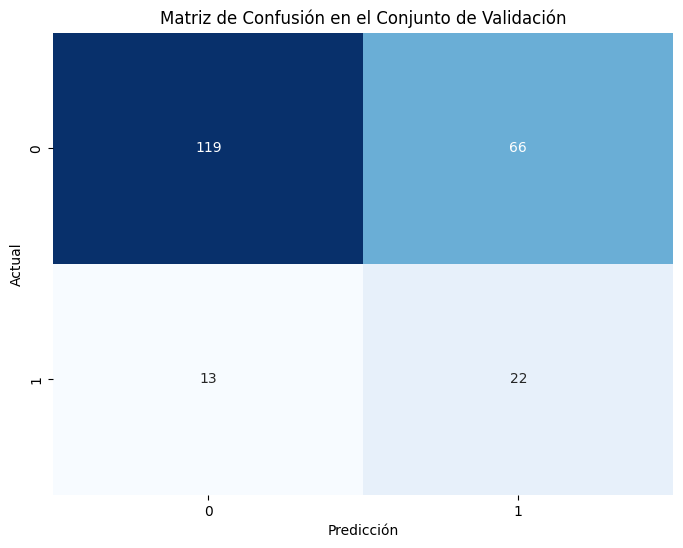


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       185
           1       0.25      0.63      0.36        35

    accuracy                           0.64       220
   macro avg       0.58      0.64      0.55       220
weighted avg       0.80      0.64      0.69       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_pred))

**ANÁLISIS DE LAS MÉTRICAS DE CADA MODELO:**

En base a la clase 1 (Caso Positivo de Attrition).

**Modelo Regresión Logística:**
- Precision: 0.92 para la clase 1, lo cual es bastante bueno.
- Recall: 0.31 indica que el modelo no está capturando muchos casos positivos.
- F1-score: 0.47 rango medio, es una combinación de precision y recall.

**Modelo Vecinos Más Cercanos kNN:**
- Precision: 0.60 para la clase 1.
- Recall: 0.09 indica una baja capacidad para capturar casos positivos.
- F1-score: 0.15 es bajo, sugiriendo un rendimiento deficiente en general.

**Modelo Regresión Logística con Class Weight:**
- Precision: 0.43 para la clase 1, más bajo que el Modelo 1 y 2.
- Recall: 0.60 indica que está capturando más casos positivos que el Modelo 1 y 2.
- F1-score: 0.50 rango medio, es una combinación de precision y recall.

**Modelo Regresión Logística con SMOTE:**
- Precision: 0.25 para la clase 1, bastante bajo.
- Recall: 0.63 indica una capacidad relativamente buena para capturar casos positivos.
- F1-score: 0.36 es un rango bajo, es una combinación de precision y recall.

**Modelo Regresión Logística con SMOTEENN:**
- Precision: 0.21 para la clase 1, muy bajo.
- Recall: 0.80 indica una buena capacidad para capturar casos positivos.
- F1-score: 0.34 es un rango bajo, es una combinación de precision y recall.

**Modelo Regresión Logística con SMOTETomek:**
- Precision: 0.25 para la clase 1, muy bajo.
- Recall: 0.63 indica una buena capacidad para capturar casos positivos.
- F1-score: 0.34 es un rango bajo, es una combinación de precision y recall.



En conclusión, con el enfoque en la predicción correcta de la clase positiva (casos positivos de attrition o abandono de trabajo), el Modelo 3 (Modelo Regresión Logística con Hiperparámetros) es la opción razonable con un equilibrio entre precisión y recall, lo cual se puede ver reflejado en su F1-Score de 0.50 en el rango medio.

# **Parte 5**. La importancia de los factores.


### **16.** En base al mejor modelo de regresión logística obtenido hasta ahora, se utiliza la magnitud de los coeficientes como métrica para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.

In [ ]:
# Librerías.
from sklearn.linear_model import LogisticRegression

# Class Weights
class_weights = {0: 1, 1: 5}

# Modelo Logistic Regression.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

# Entrenamiento del modelo.
model.fit(XtrainT, ytrainT)

# Coeficientes de los factores.
feature_coefficients = model.coef_[0]

# DataFrame para las importancias de los factores..
importancias_df = pd.DataFrame({'Factor': XtrainT.columns, 'Coeficiente': feature_coefficients})

# DataFrame por orden del valor absoluto de los coeficientes.
importancias_df['Coeficiente_Absoluto'] = importancias_df['Coeficiente'].abs()
importancias_df = importancias_df.sort_values(by = 'Coeficiente_Absoluto', ascending = False)

importancias_df.reset_index(drop = True, inplace = True)
importancias_df.index = range(1, len(importancias_df) + 1)

# Mostrar las importancias de los factores.
print("Factores Más Importantes:\n")
print(importancias_df)

Factores Más Importantes:

                               Factor  Coeficiente  Coeficiente_Absoluto
1                   TotalWorkingYears    -2.586741              2.586741
2                       MonthlyIncome    -2.483226              2.483226
3             YearsSinceLastPromotion     2.195075              2.195075
4                  NumCompaniesWorked     1.735085              1.735085
5        JobRole_Sales Representative     1.678011              1.678011
6                            OverTime     1.594024              1.594024
7    BusinessTravel_Travel_Frequently     1.592284              1.592284
8       JobRole_Laboratory Technician     1.338884              1.338884
9                                 Age    -1.262368              1.262368
10          JobRole_Research Director    -1.206204              1.206204
11               EducationField_Other    -1.103978              1.103978
12            JobRole_Sales Executive     1.018982              1.018982
13                   Dis

#### **A.** Se genera un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

<ipython-input-342-bed62f4659e7>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('magma', len(importancias_df_sorted))


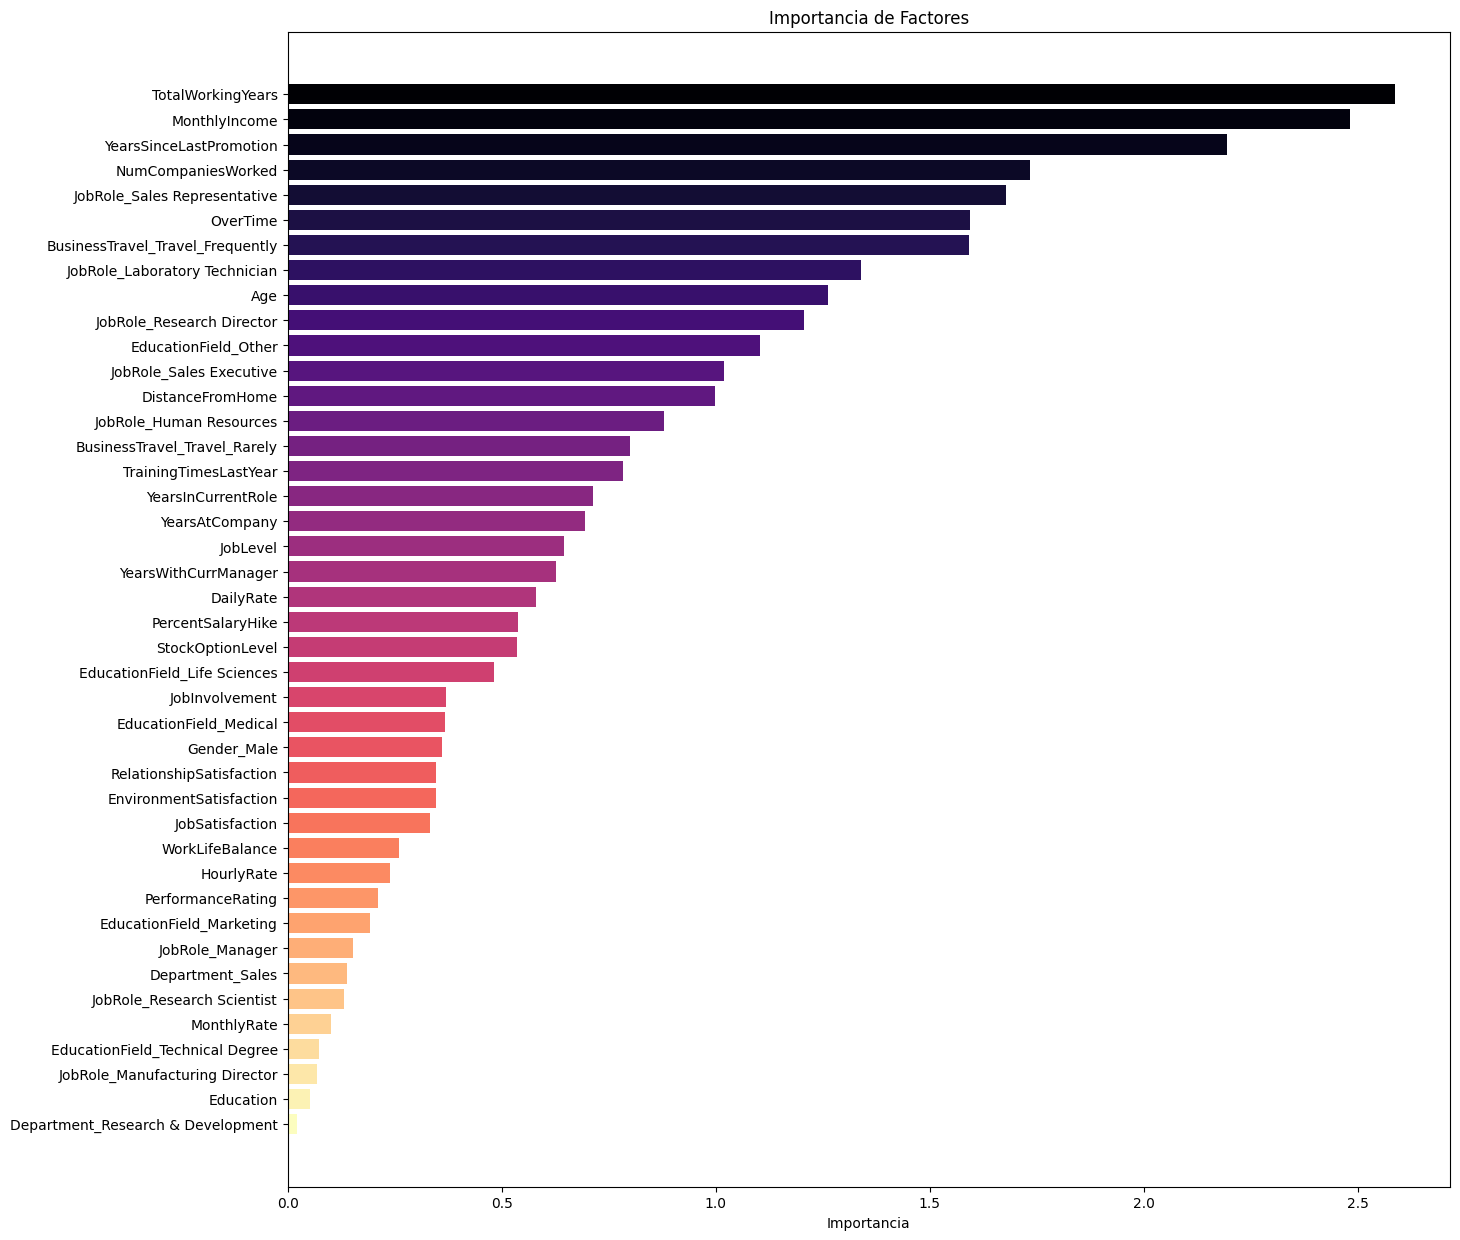

In [ ]:
# Librería
import matplotlib.pyplot as plt

# Ordenar el DataFrame por importancia permutada en orden descendente
importancias_df_sorted = importancias_df.sort_values(by = 'Coeficiente_Absoluto', ascending = True)

# Paleta de colores degradados.
color_palette = plt.cm.get_cmap('magma', len(importancias_df_sorted))

# Invertir la paleta de colores
color_palette_inverted = color_palette(np.arange(len(importancias_df_sorted)))[::-1]

# Visualizar las importancias de los factores en un gráfico de barras.
plt.figure(figsize = (15, 15))
plt.barh(importancias_df_sorted['Factor'], importancias_df_sorted['Coeficiente_Absoluto'], color = color_palette_inverted)
plt.xlabel('Importancia')
plt.title('Importancia de Factores')
plt.show()

#### **B.** ¿Cuáles factores se consideran que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

En base al análisis de los coeficientes de los factores, se puede observar que las tres características más influyentes para el abandono de trabajo son:

1. **TotalWorkingYears (Años totales de trabajo):** Los empleados con menos años de experiencia laboral son más propensos a abandonar sus trabajos, ya que la experiencia laboral acumulada está relacionada con la estabilidad laboral y el desarrollo profesional.

2. **MonthlyIncome (Ingreso mensual):** El salario es un factor crucial en la satisfacción laboral. Los empleados suelen buscar compensaciones competitivas en el mercado laboral y un ingreso que refleje su contribución y habilidades. Por lo tanto, los empleados con salarios bajos son más propensos a abandonar sus trabajos.

3. **YearsSinceLastPromotion (Años desde la última promoción):** La falta de oportunidades de crecimiento y desarrollo pueden llevar a la insatisfacción de los empleados, por lo que los empleados se vuelven más propensos a abandonar su trabajo si sienten que su progresión profesional está estancada.

#### **C.** ¿Cuáles factores se consideran que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

En base al análisis de los coeficientes de los factores, se puede observar que las tres características más influyentes para que los empleados no abandonen el trabajo son:

1. **TotalWorkingYears (Años totales de trabajo):** Los empleados con más años de experiencia laboral son menos propensos a abandonar sus trabajos, ya que la experiencia laboral acumulada está relacionada con la estabilidad laboral y el desarrollo profesional.

2. **MonthlyIncome (Ingreso mensual):** El salario es un factor crucial en la satisfacción laboral. Los empleados suelen buscar compensaciones competitivas en el mercado laboral y un ingreso que refleje su contribución y habilidades. Por lo tanto, los empleados con salarios altos son más propensos a no abandonar sus trabajos.

3. **YearsSinceLastPromotion (Años desde la última promoción):** Las oportunidades de crecimiento y desarrollo pueden llevar a la satisfacción de los empleados, por lo que los empleados se vuelven menos propensos a abandonar su trabajo si sienten que su progresión profesional avanza.

### **17.** En base al mejor modelo que se ha obtenido hasta ahora ente regresión logística y el kNN, se aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.

In [ ]:
# Librerías.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance

# Class Weights
class_weights = {0: 1, 1: 5}

# Modelo Logistic Regression.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

# Entrenamiento del modelo.
model.fit(XtrainT, ytrainT)

# Calcular la métrica original en el conjunto de prueba.
y_pred = model.predict(XvalT)
f1_original = f1_score(yvalT, y_pred, average = 'weighted')

# Aplicar la técnica de permutación de factores
resultados_permutacion = permutation_importance(model, XvalT, yvalT, scoring = 'f1_weighted', n_repeats = 30, random_state = 42)

# Importancias permutadas.
importancias_permutadas = resultados_permutacion.importances_mean

# Diccionario que asocia cada característica con su importancia permutada.
importancias_dict = dict(zip(Xval.columns, importancias_permutadas))

# Características ordenadas por importancia permutada.
importancias_ordenadas = sorted(importancias_dict.items(), key = lambda x: x[1], reverse = True)

# DataFrame para las importancias de los factores.
importancias_df = pd.DataFrame({'Factor': XvalT.columns, 'Importancia_Permutada': importancias_permutadas})

# DataFrame ordenado por importancia permutada.
importancias_df = importancias_df.sort_values(by = 'Importancia_Permutada', ascending = False)

# Reiniciar índices del DataFrame.
importancias_df.reset_index(drop = True, inplace = True)
importancias_df.index = range(1, len(importancias_df) + 1)

# Mostrar las importancias de los factores
print("Importancias de los Factores:\n")
print(importancias_df)

# Imprimir la métrica original y la importancia promedio
print(f'\nMétrica original (f1_weighted): {f1_original}')
print(f'Importancia promedio de las características: {resultados_permutacion.importances_mean.mean()}')

Importancias de los Factores:

                               Factor  Importancia_Permutada
1                            OverTime               0.056337
2                            JobLevel               0.048542
3             YearsSinceLastPromotion               0.034064
4                  NumCompaniesWorked               0.033481
5    BusinessTravel_Travel_Frequently               0.033017
6                    StockOptionLevel               0.027351
7                     JobSatisfaction               0.024555
8       JobRole_Laboratory Technician               0.021336
9             EnvironmentSatisfaction               0.020381
10                      MonthlyIncome               0.019052
11       BusinessTravel_Travel_Rarely               0.015417
12             EducationField_Medical               0.015229
13            JobRole_Sales Executive               0.013494
14                  TotalWorkingYears               0.012352
15                  PercentSalaryHike               0.

#### **A.** Se genera un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

<ipython-input-344-3fad67e5eeab>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('magma', len(importancias_df_sorted))


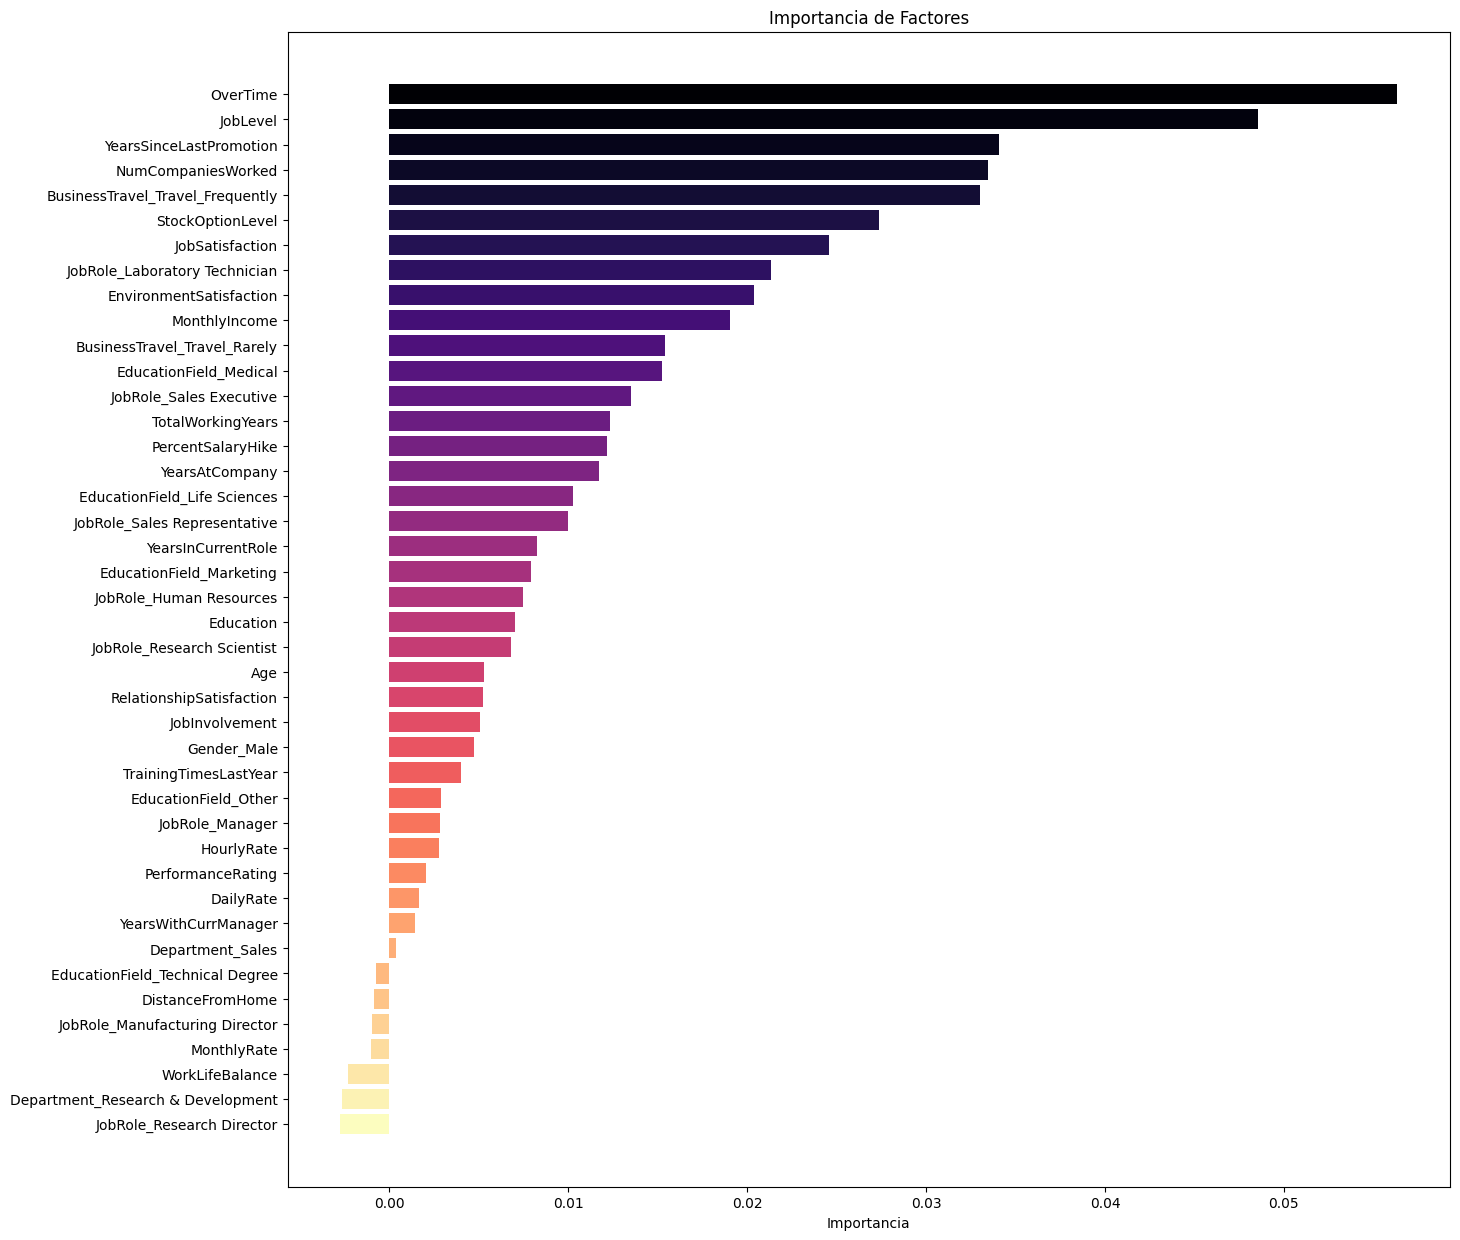

In [ ]:
# Ordenar el DataFrame por importancia permutada en orden descendente
importancias_df_sorted = importancias_df.sort_values(by = 'Importancia_Permutada', ascending = True)

# Paleta de colores degradados.
color_palette = plt.cm.get_cmap('magma', len(importancias_df_sorted))

# Invertir la paleta de colores
color_palette_inverted = color_palette(np.arange(len(importancias_df_sorted)))[::-1]

# Visualizar las importancias de los factores en un gráfico de barras.
plt.figure(figsize=(15, 15))
plt.barh(importancias_df_sorted['Factor'], importancias_df_sorted['Importancia_Permutada'], color = color_palette_inverted)
plt.xlabel('Importancia')
plt.title('Importancia de Factores')
plt.show()

#### **B.** ¿Cuáles factores se consideran que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

En base al análisis de los coeficientes permutados de los factores, se puede observar que los tres factores más influyentes para del abandono de trabajo son:

1. **OverTime (Tiempo extra):** Los empleados que trabajan horas extras tienen una mayor carga de trabajo, lo que podría influir en su decisión de abandonar el trabajo.

2. **JobLevel (Nivel del puesto):** Los empleados con un puesto menor tienden a abandonar más su trabajo.

3. **YearsSinceLastPromotion (Años desde la última promoción):** La falta de oportunidades de crecimiento y desarrollo pueden llevar a la insatisfacción de los empleados, por lo que los empleados se vuelven más propensos a abandonar su trabajo si sienten que su progresión profesional está estancada.

#### **C.** ¿Cuáles factores se consideran que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

En base al análisis de los coeficientes permutados de los factores, se puede observar que los tres factores más influyentes para el no abandono de trabajo son:

1. **OverTime (Tiempo extra):** La ausencia de trabajo en horas extras puede indicar un equilibrio saludable entre el trabajo y la vida personal, lo que puede contribuir a que el empleado se quede en su trabajo actual.

2. **JobLevel (Nivel del puesto):** Los empleados con mayores puestos tienden a permanecer más en su trabajo.

3. **YearsSinceLastPromotion (Años desde la última promoción):** Las oportunidades de crecimiento y desarrollo pueden llevar a la satisfacción de los empleados, por lo que los empleados se vuelven menos propensos a abandonar su trabajo si sienten que su progresión profesional avanza.

#### **D.** Se comparan los resultados con el ejercicio anterior y se incluyen comentarios. En particular, se comenta cuál método da los mejores factores que tienen mayor impacto en el problema de rotación de personal.

Al comparar resultados de los dos últimos ejercicios, el método de permutación de factores da los mejores factores que tienen mayor impacto en el problema de rotación de personal, ya que al permutar aleatoriamente las observaciones en las variables independientes y recalcular los coeficientes del modelo, se elimina cualquier relación genuina entre esas variables y la variable dependiente. Esto significa que los coeficientes permutados reflejan el impacto de esas variables en el modelo cuando se destruyen las relaciones verdaderas. Si un coeficiente permutado es significativamente diferente del coeficiente original, esto sugiere que la variable correspondiente tiene un impacto significativo en el modelo original.

Por lo tanto, los coeficientes permutados tienen un mayor impacto porque revelan cómo el modelo respondería si se eliminan las relaciones reales entre las variables independientes y la variable dependiente, lo que puede resaltar la importancia de ciertas características o variables en el modelo.

### **18.** Con base al mejor modelo que se ha obtenido hasta ahora entre regresión logística y el kNN y de los factores de mayor impacto que se encontraron en el inciso anterior, se utiliza la clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con los datos de entrenamiento y validación, de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. Se recuerda evitar el filtrado de información del conjunto de entrenamiento a los conjuntos de validación y de prueba.

In [ ]:
# Librería
from sklearn.feature_selection import SelectFromModel

# Seleccionado de características importantes basadas en el modelo entrenado.
selector = SelectFromModel(model, threshold = -np.sort(-importancias_permutadas)[9], max_features = 10)
selector.fit(XtrainT, ytrainT) # Fit solo en conjunto de entrenamiento para evitar filtrado de información (data-leakage).

# Filtrar las características seleccionadas en los conjuntos de datos de entrenamiento y validación.
Xtrain_reduced = selector.transform(XtrainT)
Xval_reduced = selector.transform(XvalT)

# Class Weights
class_weights = {0: 1, 1: 5}

# Entrenamiento del modelo con las características reducidas.
model_reduced = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')
model_reduced.fit(Xtrain_reduced, ytrainT) # Fit solo en conjunto de entrenamiento para evitar filtrado de información (data-leakage).

# Predicciones
y_train_reduced_pred = model_reduced.predict(Xtrain_reduced)
y_val_reduced_pred = model_reduced.predict(Xval_reduced)

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrainT, y_train_reduced_pred)
accuracy_val = accuracy_score(yvalT, y_val_reduced_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')

Accuracy en el conjunto de entrenamiento: 0.7279
Accuracy en el conjunto de validación: 0.7182


#### **A.** ¿A cuántos factores se pudo reducir el problema? Se indica cuántos se tenían y a cuántos se redujo, así como el porcentaje de reducción de factores.

In [ ]:
# Cálculo de número de factores y porcentaje.
num_factores_originales = len(XtrainT.columns)
num_factores_seleccionados = len(Xtrain_reduced[0])
porcentaje_reduccion = ((num_factores_originales - num_factores_seleccionados) / num_factores_originales) * 100

# Mostrar Resultados
print(f'Número original de factores: {num_factores_originales}')
print(f'Número de factores después de la reducción: {num_factores_seleccionados}')
print(f'Porcentaje de reducción: {porcentaje_reduccion:.2f}%')

Número original de factores: 42
Número de factores después de la reducción: 10
Porcentaje de reducción: 76.19%


El problema se pudo reducir a 10 factores de 42 que se tenían. Se logró la reducción hasta 10 factores obteniendo un desempeño similar al obtenido previamente con todos los factores. La reducción representó una reducción del 76.19% del 100% de factores que se tenían.

#### **B.** Se despliega la matriz de confusión y el reporte dado por la función classification_report().

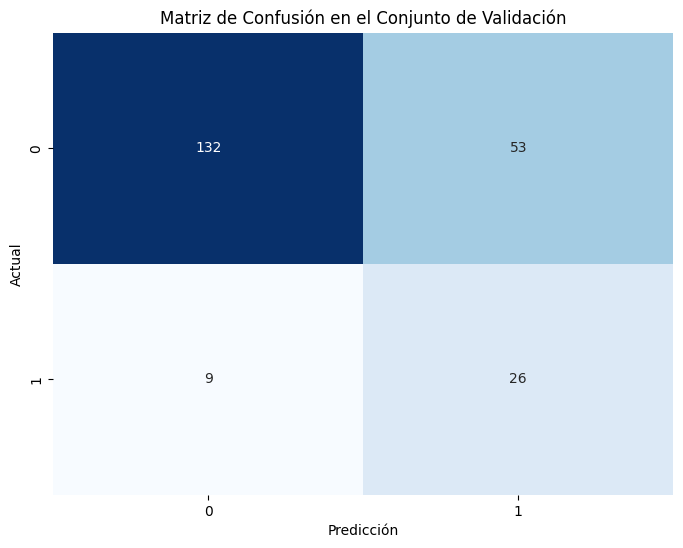


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       185
           1       0.33      0.74      0.46        35

    accuracy                           0.72       220
   macro avg       0.63      0.73      0.63       220
weighted avg       0.84      0.72      0.75       220



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(yvalT, y_val_reduced_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(yvalT, y_val_reduced_pred))

# **Parte 6**. Modelo Final y Conclusiones.

### **19.** Finalmente, con base a todos los resultados obtenidos hasta ahora, se responde a los siguientes incisos para obtener el que se considera el mejor modelo para enfrentar el problema de rotación de personal a partir de los datos históricos iniciales.

#### **A.** Se forma un nuevo conjunto de Entrenamiento con los mejores conjuntos de entrenamiento y validación que se hayan obtenido hasta ahora.

En base a los modelos y análisis previos, el conjunto de entrenamiento y validacion con todas las caracteristicas o factores con las transformaciones iniciales (inciso 4.A.I.) fue el que mejor funcionó.

In [ ]:
# Nuevo conjunto de entrenamiento X.
XtrainT_aumentado = pd.concat([XtrainT, XvalT], axis = 0)

# Convertir a data frames.
ytrainT_df = pd.DataFrame(ytrainT)
yvalT_df = pd.DataFrame(yvalT)

# Mismo nombre para la columna.
ytrainT_df.rename(columns = {ytrainT_df.columns[0]: 'Attrition'}, inplace = True)
yvalT_df.rename(columns = {yvalT_df.columns[0]: 'Attrition'}, inplace = True)

# Nuevo conjunto de entrenamiento y.
ytrainT_aumentado = pd.concat([ytrainT_df, yvalT_df], axis = 0)

# Dimensiones de los conjuntos.
print('Dimensiones de los Conjuntos:\n')

print("Dimensiones de XtrainT_aumentado:", XtrainT_aumentado.shape)
print("Dimensiones de ytrainT_aumentado:", ytrainT_aumentado.shape)

Dimensiones de los Conjuntos:

Dimensiones de XtrainT_aumentado: (1249, 42)
Dimensiones de ytrainT_aumentado: (1249, 1)


#### **B.** Se selecciona el mejor modelo de aprendizaje automático que se haya obtenido hasta ahora, entre regresión logística y kNN. Se explica por qué se considera el mejor modelo.

Con el enfoque en la predicción correcta de la clase positiva (casos positivos de attrition o abandono de trabajo), el mejor modelo es el **Modelo Regresión Logística con Hiperparámetros** (Modelo 3), ya que es el modelo que presenta el mejor equilibrio entre precisión y recall, lo cual se puede ver reflejado en su F1-Score.

In [ ]:
# Librería
from sklearn.linear_model import LogisticRegression

# Se define el peso para cada clase.
# La variable 'Attritiion' tien 1233 casos negativos y 237 casos positivos.
# 1233 / 237 = 5.202531 -> 5
# 1 Negativo, 5 Positivos
class_weights = {0: 1, 1: 5}

# Regresión logística con hiperparámetros.
model = LogisticRegression(random_state = 42, class_weight = class_weights, max_iter = 1000, solver = 'saga')

#### **C.** Se entrena el modelo con el nuevo conjunto de entrenamiento aumentado y se utiliza el conjunto de Prueba (Test) para obtener el desempeño final del mejor modelo. Para ello:

In [ ]:
# Convertir a array de una dimensión (1D).
ytrainT_aumentado = np.ravel(ytrainT_aumentado)

# Entrenamiento del modelo.
model.fit(XtrainT_aumentado, ytrainT_aumentado)

# Predicciones en el conjunto de entrenamiento y prueba (test).
y_train_pred = model.predict(XtrainT_aumentado)
y_test_pred = model.predict(XtestT)

##### **I.** Se despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.

In [ ]:
# Librería
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión en conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrainT_aumentado, y_train_pred)
accuracy_test = accuracy_score(ytestT, y_test_pred)

# Mostrar resultados de accuracy.
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en el conjunto de prueba: {accuracy_test:.4f}')

Accuracy en el conjunto de entrenamiento: 0.7926
Accuracy en el conjunto de prueba: 0.7692


##### **II.** Se despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.

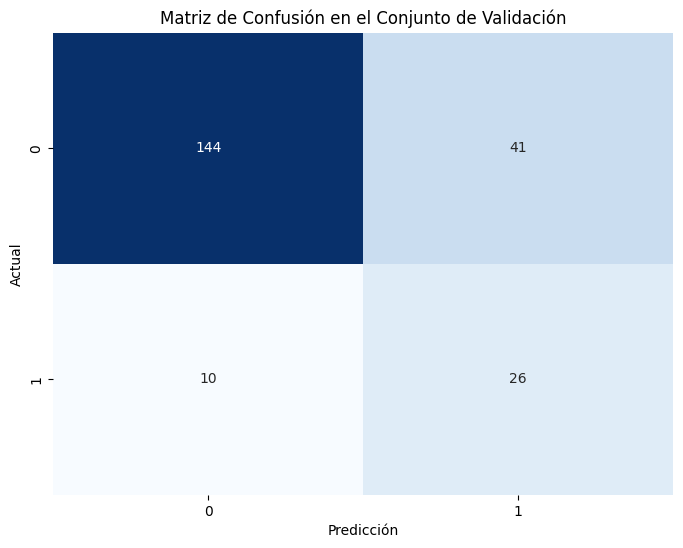


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       185
           1       0.39      0.72      0.50        36

    accuracy                           0.77       221
   macro avg       0.66      0.75      0.68       221
weighted avg       0.85      0.77      0.79       221



In [ ]:
# Librerías
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Matrtiz de confusión.
matriz_confusion = confusion_matrix(ytestT, y_test_pred)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(ytestT, y_test_pred))

##### **III.** Se incluye las conclusiones finales de la actividad. En particular se interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.

Los resultados de las métricas de evaluación revelan la capacidad del modelo para predecir la rotación de personal. Con una alta precisión del 94% para la clase de "no rotación de personal" (clase 0), el modelo muestra una fuerte capacidad para identificar correctamente a aquellos empleados que probablemente permanecerán en la empresa. El recall asociado con esta clase es del 78%, lo que indica que el modelo no siempre logra capturar todos los casos de no rotación de personal presentes en los datos. El f1-score es de 85%, lo que indica que el modelo logra un alto equilibrio entre precisión y recall para predecir la no rotación de personal.

Con respecto a la "no rotación de personal" (clase 0), el moodelo logra identificar con precisión a la mayoría de los empleados que probablemente permanecerán en la empresa (alta precisión) mientras que también logra capturar una proporción significativa de los casos reales de no rotación de personal en los datos (alto recall).


Por otro lado, la precisión es considerablemente más baja para la clase de "rotación de personal" (clase 1), registrando un 39%. A pesar de esto, el recall es significativamente más alto, alcanzando el 72%, lo que sugiere que el modelo es más efectivo para identificar aquellos empleados que probablemente dejarán la empresa. Sin embargo, esta mayor capacidad para detectar la rotación de personal también conlleva un riesgo de clasificar erróneamente a empleados que no tienen intención de abandonar la organización. El f1-score es de 50%,  lo que muestra un buen balance entre la precisión y el recall de la "rotación de personal" (clase 1).

De todos los modelos y conjuntos de datos, este modelo fue de los que dió los mejores resultados en su balance de métricas. Por consiguiente, este modelo puede ser útil para predecir diferentes casos de abandono o no abandono de trabajo y poder llevar a cabo las acciones necesarias para retener a los empleados o evitar las acciones innecesarias. El modelo puede aportar gran valor a las empresas, ya que el predecir los casos de rotación de personal permite a las organizaciones hacer intervenciones tempranas e implememtar estrategias para retener el talento y gestionar la fuerza laboral de manera más efectiva.





